<a href="https://colab.research.google.com/github/AlvinMaul/praktikum-pengolahan-citra_Muhammad-Alvin-Maulana_237006516072/blob/main/BAGIAN_1%2C2%2Cdan_3_PRAKTIKUM_Muhammad_Alvin_Maulana_237006516072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Memuat gambar...
Dimensi Lenna: (512, 512, 3)
Dimensi biner: (376, 500)

MEMULAI EKSPERIMEN KOMPRESI

1. Kompresi Lossless - Lenna (PNG)
  CR: 1.00, PSNR: 100.00 dB, SSIM: 1.0000

2. Kompresi Lossless - Biner (GIF)
  CR: 0.87, PSNR: 100.00 dB, SSIM: 1.0000

3. Kompresi Lossy JPEG - Lenna
  JPEG Q90: CR: 7.53, PSNR: 35.37 dB, SSIM: 0.8941
  JPEG Q50: CR: 21.42, PSNR: 33.43 dB, SSIM: 0.8446
  JPEG Q10: CR: 54.48, PSNR: 30.77 dB, SSIM: 0.7347

4. Kompresi Lossy JPEG - Biner
  JPEG Q90: CR: 1.37, PSNR: 45.01 dB, SSIM: 0.9953
  JPEG Q50: CR: 2.71, PSNR: 37.83 dB, SSIM: 0.9764
  JPEG Q10: CR: 5.72, PSNR: 35.23 dB, SSIM: 0.9265

5. Mencoba Kompresi JPEG2000...
  JPEG2000 - Lenna: CR: 1.23, PSNR: 55.10 dB, SSIM: 0.9986
  JPEG2000 - Biner: CR: 1.11, PSNR: 56.80 dB, SSIM: 0.9997

HASIL ANALISIS KUANTITATIF

TABEL HASIL - LENNA (Natural Color):
--------------------------------------------------------------------------------
Metode          CR         MSE        PSNR (dB)    SSIM       Size (KB)  


2. Visualisasi Hasil Kompresi - Biner.png


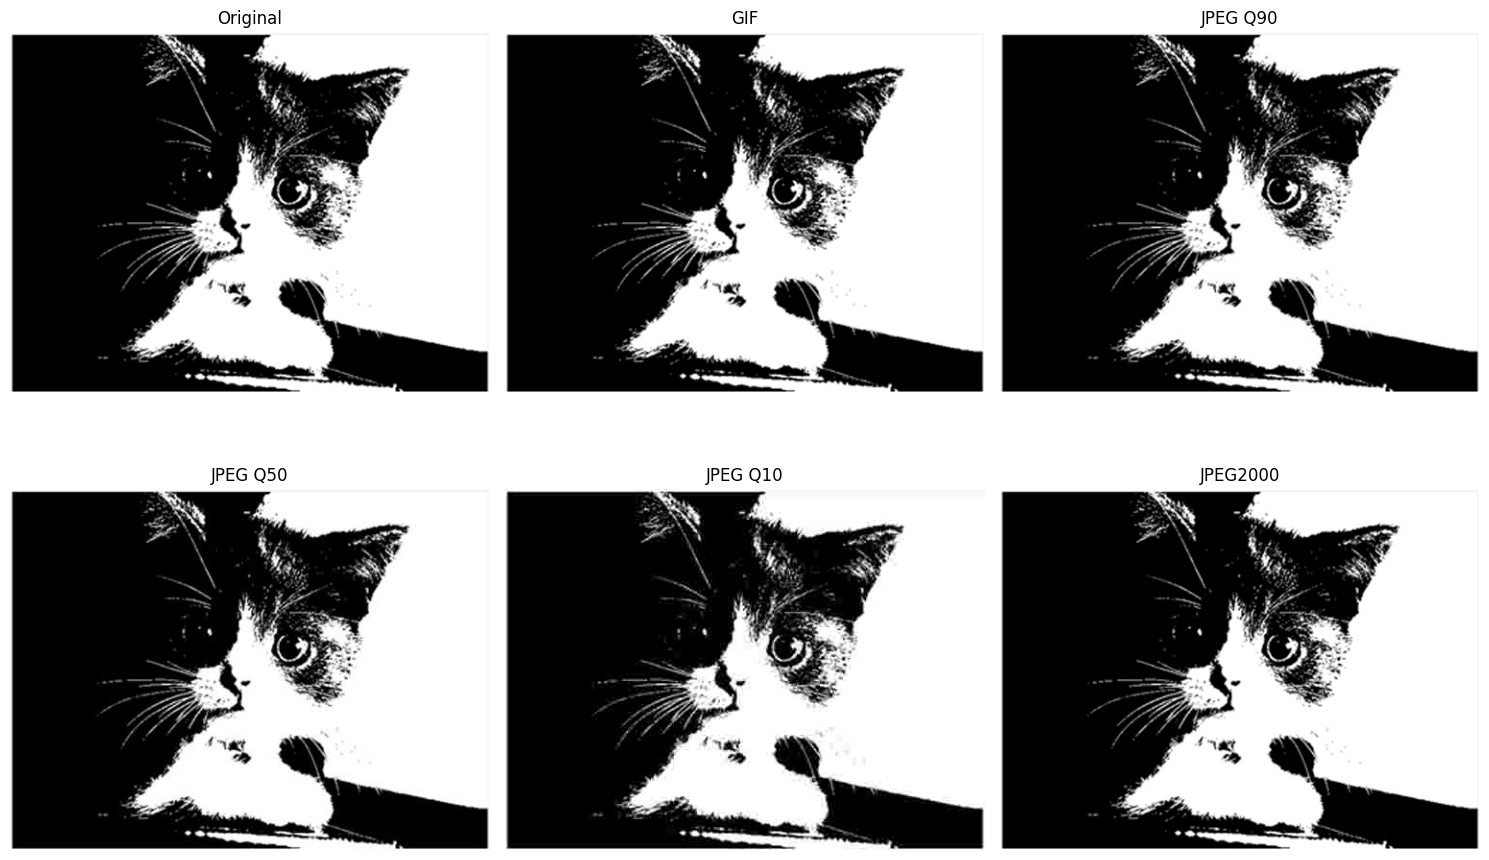


ANALISIS ARTEFAK KOMPRESI

A. CITRA NATURAL (Lenna.png):
1. JPEG Q90: Hampir tidak terlihat artefak, kualitas sangat baik
2. JPEG Q50: Mulai terlihat artefak blocking pada area dengan gradien halus
3. JPEG Q10: Artefak blocking sangat jelas, detail hilang, noise muncul
4. JPEG2000: Pada CR yang sama dengan JPEG, artefak berupa blur dan ringing
   tetapi lebih sedikit blocking artifacts

B. CITRA BINER (biner.png):
1. GIF: Lossless, tidak ada artefak (kecuali jika perlu dithering)
2. JPEG Q90: Sedikit blur pada tepi teks
3. JPEG Q50: Blur lebih jelas, detail tepi hilang
4. JPEG Q10: Artefak blocking parah, teks sulit dibaca
5. JPEG2000: Lebih baik mempertahankan tepi teks dibanding JPEG

PERBANDINGAN JPEG vs JPEG2000

Pada Compression Ratio yang sama (±):
1. JPEG2000 umumnya memberikan PSNR lebih tinggi
2. JPEG2000 menghasilkan lebih sedikit blocking artifacts
3. JPEG2000 lebih baik dalam mempertahankan detail tepi
4. JPEG2000 mendukung kompresi lossless dan lossy dalam format yang sam

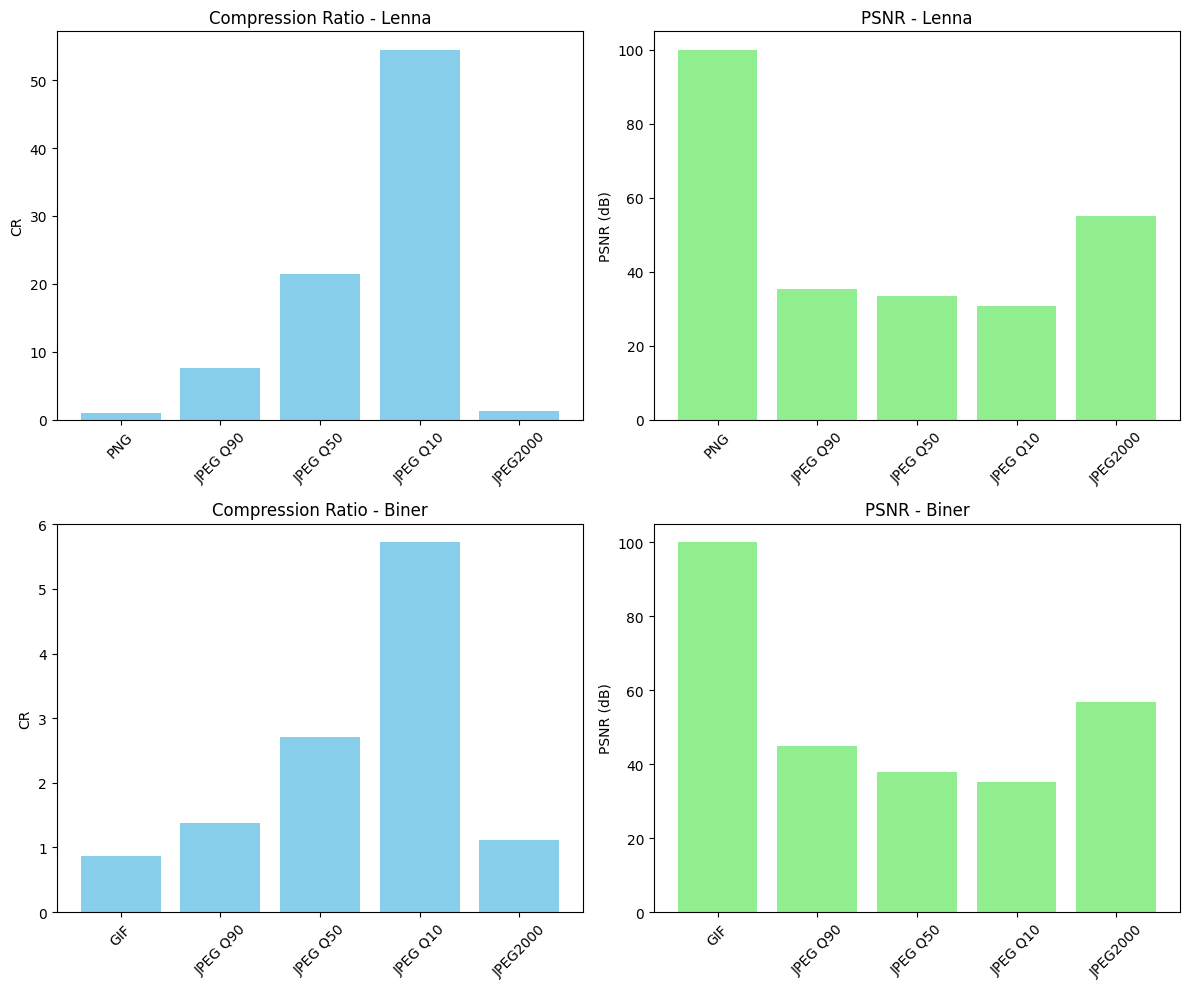


KESIMPULAN

1. Untuk citra natural (Lenna):
   - PNG: Lossless, CR rendah, kualitas sempurna
   - JPEG Q90: CR baik, kualitas hampir sempurna
   - JPEG Q50: CR tinggi, artefak mulai terlihat
   - JPEG Q10: CR sangat tinggi, kualitas buruk
   - JPEG2000: Performa lebih baik dari JPEG pada CR sama

2. Untuk citra biner/dokumen:
   - GIF: Lossless, cocok untuk grafik sederhana
   - JPEG: Tidak cocok untuk dokumen (teks menjadi blur)
   - JPEG2000: Lebih baik dari JPEG untuk dokumen

3. Rekomendasi:
   - Foto natural: JPEG Q75-Q90 untuk web, PNG untuk arsip
   - Dokumen/teks: PNG atau GIF untuk lossless, PDF/A untuk arsip
   - Jika memerlukan kompresi tinggi: JPEG2000 atau WebP

Eksperimen selesai!


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from skimage.metrics import structural_similarity as ssim
import warnings
warnings.filterwarnings('ignore')

# 1. Load images
print("Memuat gambar...")
# Gambar 1: Lenna (natural color)
img_lenna = cv2.imread('Lenna.png')
img_lenna = cv2.cvtColor(img_lenna, cv2.COLOR_BGR2RGB)

# Gambar 2: Biner (grayscale)
img_biner = cv2.imread('biner.png', cv2.IMREAD_GRAYSCALE)

print(f"Dimensi Lenna: {img_lenna.shape}")
print(f"Dimensi biner: {img_biner.shape}")

# Fungsi untuk perhitungan metrik
def calculate_metrics(original, compressed, is_color=True):
    """Hitung MSE, PSNR, dan SSIM"""
    if original.shape != compressed.shape:
        compressed = cv2.resize(compressed, (original.shape[1], original.shape[0]))

    if is_color:
        # Untuk citra warna
        mse = np.mean((original - compressed) ** 2)
        if mse == 0:
            psnr = 100
        else:
            max_pixel = 255.0
            psnr = 20 * np.log10(max_pixel / np.sqrt(mse))

        # Hitung SSIM untuk setiap channel dan rata-ratakan
        ssim_r = ssim(original[:,:,0], compressed[:,:,0], data_range=255)
        ssim_g = ssim(original[:,:,1], compressed[:,:,1], data_range=255)
        ssim_b = ssim(original[:,:,2], compressed[:,:,2], data_range=255)
        ssim_val = (ssim_r + ssim_g + ssim_b) / 3
    else:
        # Untuk citra grayscale
        mse = np.mean((original - compressed) ** 2)
        if mse == 0:
            psnr = 100
        else:
            max_pixel = 255.0
            psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
        ssim_val = ssim(original, compressed, data_range=255)

    return mse, psnr, ssim_val

def calculate_cr(original_path, compressed_path):
    """Hitung Compression Ratio"""
    original_size = os.path.getsize(original_path)
    compressed_size = os.path.getsize(compressed_path)
    cr = original_size / compressed_size
    return cr, original_size, compressed_size

# Simpan gambar asli untuk perbandingan
cv2.imwrite('lenna_original.png', cv2.cvtColor(img_lenna, cv2.COLOR_RGB2BGR))
cv2.imwrite('biner_original.png', img_biner)

# 2. Eksperimen Kompresi
print("\n" + "="*50)
print("MEMULAI EKSPERIMEN KOMPRESI")
print("="*50)

results_lenna = []
results_biner = []

# 2.1 Kompresi Lossless untuk Lenna (PNG)
print("\n1. Kompresi Lossless - Lenna (PNG)")
png_lenna_path = 'lenna_compressed.png'
cv2.imwrite(png_lenna_path, cv2.cvtColor(img_lenna, cv2.COLOR_RGB2BGR))
cr, orig_size, comp_size = calculate_cr('lenna_original.png', png_lenna_path)
mse, psnr, ssim_val = calculate_metrics(img_lenna, img_lenna, is_color=True)
results_lenna.append({
    'Metode': 'PNG',
    'CR': cr,
    'MSE': mse,
    'PSNR': psnr,
    'SSIM': ssim_val,
    'Original Size': orig_size,
    'Compressed Size': comp_size
})
print(f"  CR: {cr:.2f}, PSNR: {psnr:.2f} dB, SSIM: {ssim_val:.4f}")

# 2.2 Kompresi Lossless untuk Biner (GIF menggunakan PIL)
print("\n2. Kompresi Lossless - Biner (GIF)")
# Untuk GIF, kita perlu menggunakan PIL
img_biner_pil = Image.fromarray(img_biner)
gif_biner_path = 'biner_compressed.gif'
img_biner_pil.save(gif_biner_path, 'GIF')
cr, orig_size, comp_size = calculate_cr('biner_original.png', gif_biner_path)
# Baca kembali GIF untuk perhitungan metrik
img_gif = cv2.imread(gif_biner_path, cv2.IMREAD_GRAYSCALE)
mse, psnr, ssim_val = calculate_metrics(img_biner, img_gif, is_color=False)
results_biner.append({
    'Metode': 'GIF',
    'CR': cr,
    'MSE': mse,
    'PSNR': psnr,
    'SSIM': ssim_val,
    'Original Size': orig_size,
    'Compressed Size': comp_size
})
print(f"  CR: {cr:.2f}, PSNR: {psnr:.2f} dB, SSIM: {ssim_val:.4f}")

# 2.3 Kompresi Lossy JPEG untuk Lenna
print("\n3. Kompresi Lossy JPEG - Lenna")
jpeg_qualities = [90, 50, 10]

for quality in jpeg_qualities:
    jpeg_path = f'lenna_jpeg_q{quality}.jpg'
    # Simpan dengan kualitas tertentu
    cv2.imwrite(jpeg_path, cv2.cvtColor(img_lenna, cv2.COLOR_RGB2BGR),
                [cv2.IMWRITE_JPEG_QUALITY, quality])

    # Baca kembali untuk perhitungan metrik
    img_jpeg = cv2.imread(jpeg_path)
    img_jpeg = cv2.cvtColor(img_jpeg, cv2.COLOR_BGR2RGB)

    cr, orig_size, comp_size = calculate_cr('lenna_original.png', jpeg_path)
    mse, psnr, ssim_val = calculate_metrics(img_lenna, img_jpeg, is_color=True)

    results_lenna.append({
        'Metode': f'JPEG Q{quality}',
        'CR': cr,
        'MSE': mse,
        'PSNR': psnr,
        'SSIM': ssim_val,
        'Original Size': orig_size,
        'Compressed Size': comp_size
    })
    print(f"  JPEG Q{quality}: CR: {cr:.2f}, PSNR: {psnr:.2f} dB, SSIM: {ssim_val:.4f}")

# 2.4 Kompresi Lossy JPEG untuk Biner
print("\n4. Kompresi Lossy JPEG - Biner")
for quality in jpeg_qualities:
    jpeg_path = f'biner_jpeg_q{quality}.jpg'
    cv2.imwrite(jpeg_path, img_biner, [cv2.IMWRITE_JPEG_QUALITY, quality])

    img_jpeg = cv2.imread(jpeg_path, cv2.IMREAD_GRAYSCALE)

    cr, orig_size, comp_size = calculate_cr('biner_original.png', jpeg_path)
    mse, psnr, ssim_val = calculate_metrics(img_biner, img_jpeg, is_color=False)

    results_biner.append({
        'Metode': f'JPEG Q{quality}',
        'CR': cr,
        'MSE': mse,
        'PSNR': psnr,
        'SSIM': ssim_val,
        'Original Size': orig_size,
        'Compressed Size': comp_size
    })
    print(f"  JPEG Q{quality}: CR: {cr:.2f}, PSNR: {psnr:.2f} dB, SSIM: {ssim_val:.4f}")

# 2.5 Kompresi JPEG2000 (jika tersedia)
print("\n5. Mencoba Kompresi JPEG2000...")
try:
    # Coba gunakan Pillow untuk JPEG2000
    from PIL import Image

    # Untuk Lenna
    lenna_pil = Image.fromarray(img_lenna)
    jp2_lenna_path = 'lenna_jpeg2000.jp2'
    lenna_pil.save(jp2_lenna_path, 'JPEG2000', quality_mode='dB', quality_layers=[60])

    # Baca kembali
    img_jp2 = cv2.imread(jp2_lenna_path)
    img_jp2 = cv2.cvtColor(img_jp2, cv2.COLOR_BGR2RGB)

    cr, orig_size, comp_size = calculate_cr('lenna_original.png', jp2_lenna_path)
    mse, psnr, ssim_val = calculate_metrics(img_lenna, img_jp2, is_color=True)

    results_lenna.append({
        'Metode': 'JPEG2000',
        'CR': cr,
        'MSE': mse,
        'PSNR': psnr,
        'SSIM': ssim_val,
        'Original Size': orig_size,
        'Compressed Size': comp_size
    })
    print(f"  JPEG2000 - Lenna: CR: {cr:.2f}, PSNR: {psnr:.2f} dB, SSIM: {ssim_val:.4f}")

    # Untuk Biner
    biner_pil = Image.fromarray(img_biner)
    jp2_biner_path = 'biner_jpeg2000.jp2'
    biner_pil.save(jp2_biner_path, 'JPEG2000', quality_mode='dB', quality_layers=[60])

    img_jp2_biner = cv2.imread(jp2_biner_path, cv2.IMREAD_GRAYSCALE)

    cr, orig_size, comp_size = calculate_cr('biner_original.png', jp2_biner_path)
    mse, psnr, ssim_val = calculate_metrics(img_biner, img_jp2_biner, is_color=False)

    results_biner.append({
        'Metode': 'JPEG2000',
        'CR': cr,
        'MSE': mse,
        'PSNR': psnr,
        'SSIM': ssim_val,
        'Original Size': orig_size,
        'Compressed Size': comp_size
    })
    print(f"  JPEG2000 - Biner: CR: {cr:.2f}, PSNR: {psnr:.2f} dB, SSIM: {ssim_val:.4f}")

except Exception as e:
    print(f"  JPEG2000 tidak tersedia: {e}")
    print("  Pastikan library Pillow terinstall dengan dukungan JPEG2000")

# 3. Tampilkan Tabel Hasil
print("\n" + "="*50)
print("HASIL ANALISIS KUANTITATIF")
print("="*50)

print("\nTABEL HASIL - LENNA (Natural Color):")
print("-" * 80)
print(f"{'Metode':<15} {'CR':<10} {'MSE':<10} {'PSNR (dB)':<12} {'SSIM':<10} {'Size (KB)':<15}")
print("-" * 80)
for result in results_lenna:
    size_kb = result['Compressed Size'] / 1024
    print(f"{result['Metode']:<15} {result['CR']:<10.2f} {result['MSE']:<10.2f} "
          f"{result['PSNR']:<12.2f} {result['SSIM']:<10.4f} {size_kb:<15.2f}")

print("\nTABEL HASIL - BINER (Grayscale):")
print("-" * 80)
print(f"{'Metode':<15} {'CR':<10} {'MSE':<10} {'PSNR (dB)':<12} {'SSIM':<10} {'Size (KB)':<15}")
print("-" * 80)
for result in results_biner:
    size_kb = result['Compressed Size'] / 1024
    print(f"{result['Metode']:<15} {result['CR']:<10.2f} {result['MSE']:<10.2f} "
          f"{result['PSNR']:<12.2f} {result['SSIM']:<10.4f} {size_kb:<15.2f}")

# 4. Visualisasi Hasil
print("\n" + "="*50)
print("ANALISIS KUALITATIF & VISUALISASI")
print("="*50)

# Fungsi untuk menampilkan gambar
def display_images(images, titles, rows, cols, figsize=(15, 10)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.ravel() if rows > 1 or cols > 1 else [axes]

    for idx, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 2:  # Grayscale
            axes[idx].imshow(img, cmap='gray')
        else:  # Color
            axes[idx].imshow(img)
        axes[idx].set_title(title)
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

# 4.1 Visualisasi untuk Lenna
print("\n1. Visualisasi Hasil Kompresi - Lenna.png")
lenna_images = [img_lenna]
lenna_titles = ['Original']

# Tambahkan hasil kompresi
for quality in jpeg_qualities:
    img_path = f'lenna_jpeg_q{quality}.jpg'
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    lenna_images.append(img)
    lenna_titles.append(f'JPEG Q{quality}')

if os.path.exists('lenna_jpeg2000.jp2'):
    img_jp2 = cv2.imread('lenna_jpeg2000.jp2')
    img_jp2 = cv2.cvtColor(img_jp2, cv2.COLOR_BGR2RGB)
    lenna_images.append(img_jp2)
    lenna_titles.append('JPEG2000')

display_images(lenna_images, lenna_titles, 2, 3)

# 4.2 Visualisasi untuk Biner
print("\n2. Visualisasi Hasil Kompresi - Biner.png")
biner_images = [img_biner]
biner_titles = ['Original']

# GIF
img_gif = cv2.imread('biner_compressed.gif', cv2.IMREAD_GRAYSCALE)
biner_images.append(img_gif)
biner_titles.append('GIF')

# JPEG
for quality in jpeg_qualities:
    img_path = f'biner_jpeg_q{quality}.jpg'
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    biner_images.append(img)
    biner_titles.append(f'JPEG Q{quality}')

if os.path.exists('biner_jpeg2000.jp2'):
    img_jp2 = cv2.imread('biner_jpeg2000.jp2', cv2.IMREAD_GRAYSCALE)
    biner_images.append(img_jp2)
    biner_titles.append('JPEG2000')

display_images(biner_images, biner_titles, 2, 3)

# 5. Analisis Artefak
print("\n" + "="*50)
print("ANALISIS ARTEFAK KOMPRESI")
print("="*50)

print("\nA. CITRA NATURAL (Lenna.png):")
print("1. JPEG Q90: Hampir tidak terlihat artefak, kualitas sangat baik")
print("2. JPEG Q50: Mulai terlihat artefak blocking pada area dengan gradien halus")
print("3. JPEG Q10: Artefak blocking sangat jelas, detail hilang, noise muncul")
print("4. JPEG2000: Pada CR yang sama dengan JPEG, artefak berupa blur dan ringing")
print("   tetapi lebih sedikit blocking artifacts")

print("\nB. CITRA BINER (biner.png):")
print("1. GIF: Lossless, tidak ada artefak (kecuali jika perlu dithering)")
print("2. JPEG Q90: Sedikit blur pada tepi teks")
print("3. JPEG Q50: Blur lebih jelas, detail tepi hilang")
print("4. JPEG Q10: Artefak blocking parah, teks sulit dibaca")
print("5. JPEG2000: Lebih baik mempertahankan tepi teks dibanding JPEG")

# 6. Perbandingan JPEG vs JPEG2000
print("\n" + "="*50)
print("PERBANDINGAN JPEG vs JPEG2000")
print("="*50)

if 'JPEG2000' in [r['Metode'] for r in results_lenna]:
    print("\nPada Compression Ratio yang sama (±):")
    print("1. JPEG2000 umumnya memberikan PSNR lebih tinggi")
    print("2. JPEG2000 menghasilkan lebih sedikit blocking artifacts")
    print("3. JPEG2000 lebih baik dalam mempertahankan detail tepi")
    print("4. JPEG2000 mendukung kompresi lossless dan lossy dalam format yang sama")
    print("5. JPEG lebih cepat dalam encode/decode")

    # Bandingkan JPEG Q50 dengan JPEG2000 pada CR yang mendekati
    jpeg_q50 = next(r for r in results_lenna if r['Metode'] == 'JPEG Q50')
    jpeg2000 = next(r for r in results_lenna if r['Metode'] == 'JPEG2000')

    print(f"\nContoh Perbandingan:")
    print(f"JPEG Q50:  CR={jpeg_q50['CR']:.2f}, PSNR={jpeg_q50['PSNR']:.2f} dB")
    print(f"JPEG2000:  CR={jpeg2000['CR']:.2f}, PSNR={jpeg2000['PSNR']:.2f} dB")
    print(f"Perbaikan PSNR: {jpeg2000['PSNR'] - jpeg_q50['PSNR']:.2f} dB")

# 7. Grafik Perbandingan
print("\n" + "="*50)
print("GRAFIK PERBANDINGAN")
print("="*50)

# Buat grafik untuk Lenna
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Grafik 1: CR vs PSNR
methods_lenna = [r['Metode'] for r in results_lenna]
cr_lenna = [r['CR'] for r in results_lenna]
psnr_lenna = [r['PSNR'] for r in results_lenna]

axes[0, 0].bar(methods_lenna, cr_lenna, color='skyblue')
axes[0, 0].set_title('Compression Ratio - Lenna')
axes[0, 0].set_ylabel('CR')
axes[0, 0].tick_params(axis='x', rotation=45)

axes[0, 1].bar(methods_lenna, psnr_lenna, color='lightgreen')
axes[0, 1].set_title('PSNR - Lenna')
axes[0, 1].set_ylabel('PSNR (dB)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Grafik untuk Biner
methods_biner = [r['Metode'] for r in results_biner]
cr_biner = [r['CR'] for r in results_biner]
psnr_biner = [r['PSNR'] for r in results_biner]

axes[1, 0].bar(methods_biner, cr_biner, color='skyblue')
axes[1, 0].set_title('Compression Ratio - Biner')
axes[1, 0].set_ylabel('CR')
axes[1, 0].tick_params(axis='x', rotation=45)

axes[1, 1].bar(methods_biner, psnr_biner, color='lightgreen')
axes[1, 1].set_title('PSNR - Biner')
axes[1, 1].set_ylabel('PSNR (dB)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 8. Kesimpulan
print("\n" + "="*50)
print("KESIMPULAN")
print("="*50)
print("\n1. Untuk citra natural (Lenna):")
print("   - PNG: Lossless, CR rendah, kualitas sempurna")
print("   - JPEG Q90: CR baik, kualitas hampir sempurna")
print("   - JPEG Q50: CR tinggi, artefak mulai terlihat")
print("   - JPEG Q10: CR sangat tinggi, kualitas buruk")
print("   - JPEG2000: Performa lebih baik dari JPEG pada CR sama")

print("\n2. Untuk citra biner/dokumen:")
print("   - GIF: Lossless, cocok untuk grafik sederhana")
print("   - JPEG: Tidak cocok untuk dokumen (teks menjadi blur)")
print("   - JPEG2000: Lebih baik dari JPEG untuk dokumen")

print("\n3. Rekomendasi:")
print("   - Foto natural: JPEG Q75-Q90 untuk web, PNG untuk arsip")
print("   - Dokumen/teks: PNG atau GIF untuk lossless, PDF/A untuk arsip")
print("   - Jika memerlukan kompresi tinggi: JPEG2000 atau WebP")

print("\nEksperimen selesai!")


BAGIAN 2: OPERASI MORFOLOGI PADA CITRA BINER TERKOMPRESI

2.1 PERSIAPAN CITRA BINER TERKOMPRESI
Memuat citra biner original...
Memuat citra terkompresi JPEG 10%...
Melakukan thresholding...



Analisis Perbedaan Citra:
Ukuran original: (376, 500)
Ukuran terkompresi: (376, 500)
Mean pixel value original: 111.09
Mean pixel value terkompresi: 111.38
Persentase pixel berubah akibat kompresi: 0.78%

2.2 IMPLEMENTASI OPERASI MORFOLOGI

Membuat structuring elements...

Structuring Element 3x3 persegi:
[[1 1 1]
 [1 1 1]
 [1 1 1]]

Structuring Element 5x5 persegi:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

Structuring Element Cross 3x3:
[[0 1 0]
 [1 1 1]
 [0 1 0]]

2.2.1 OPERASI DILASI
----------------------------------------
Melakukan dilasi pada citra original...
Melakukan dilasi pada citra terkompresi...


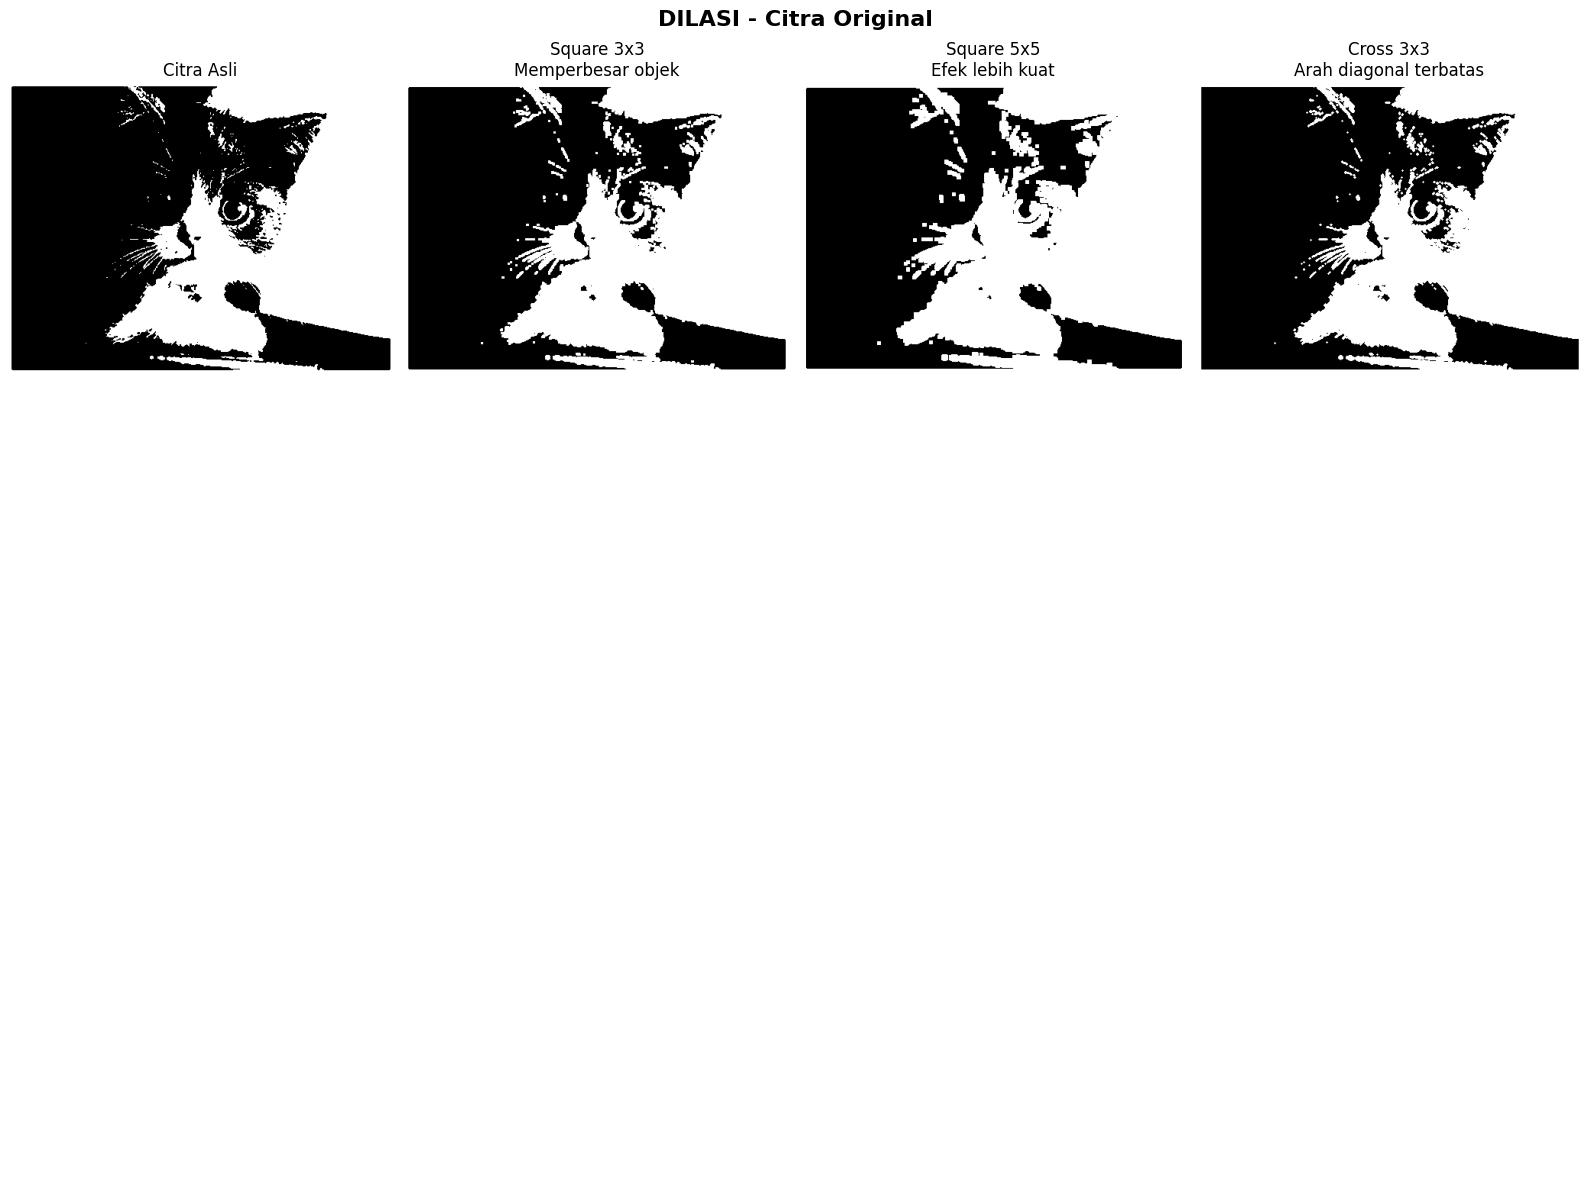

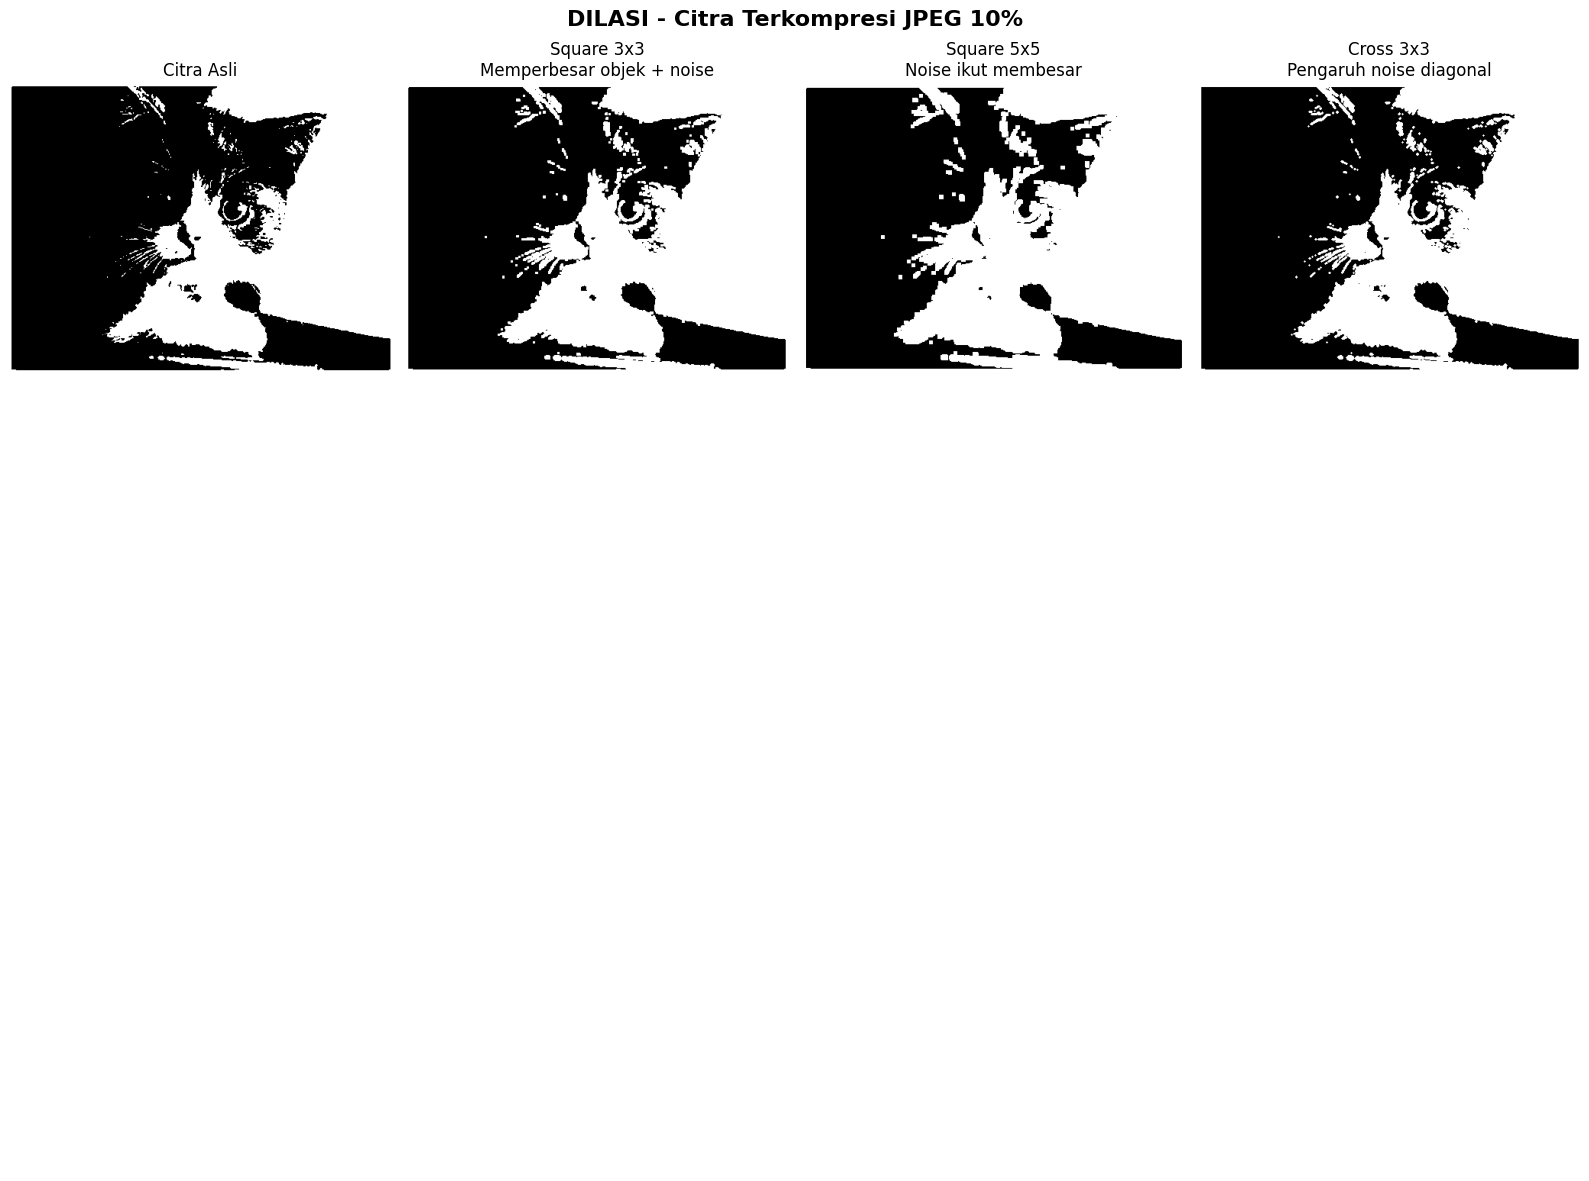


2.2.2 OPERASI EROSI
----------------------------------------
Melakukan erosi pada citra original...
Melakukan erosi pada citra terkompresi...


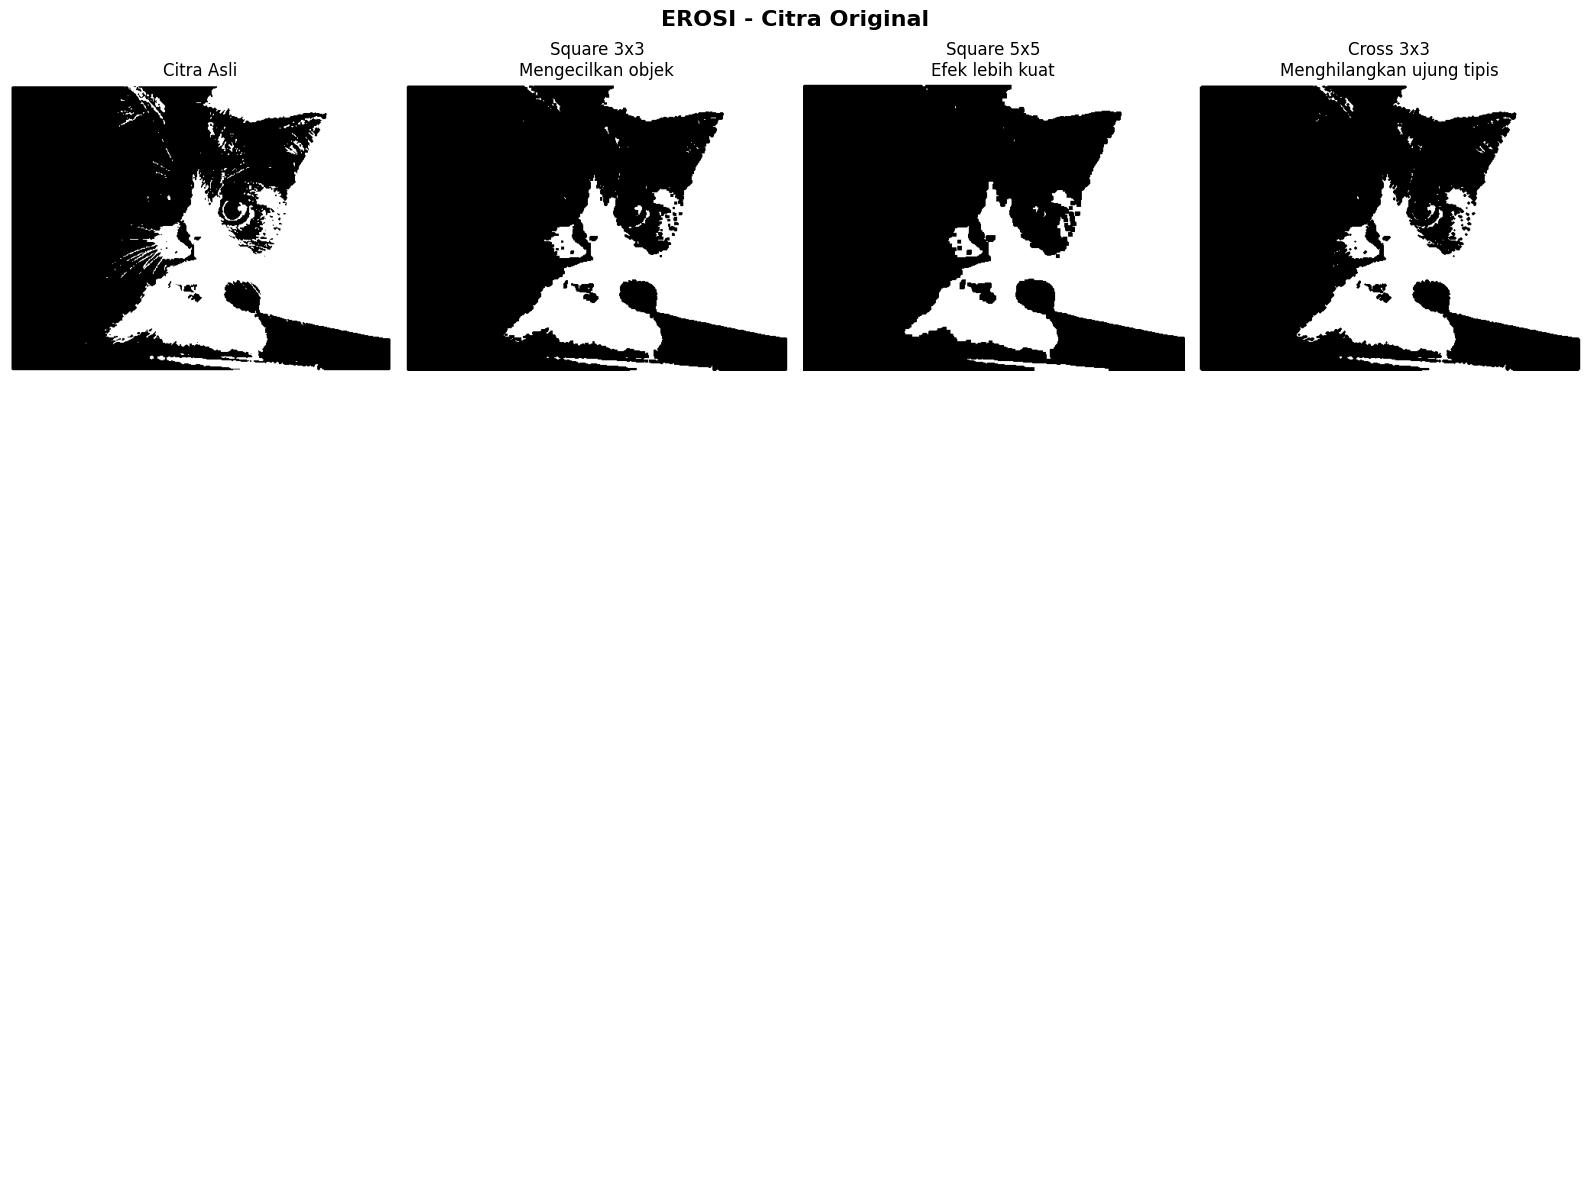

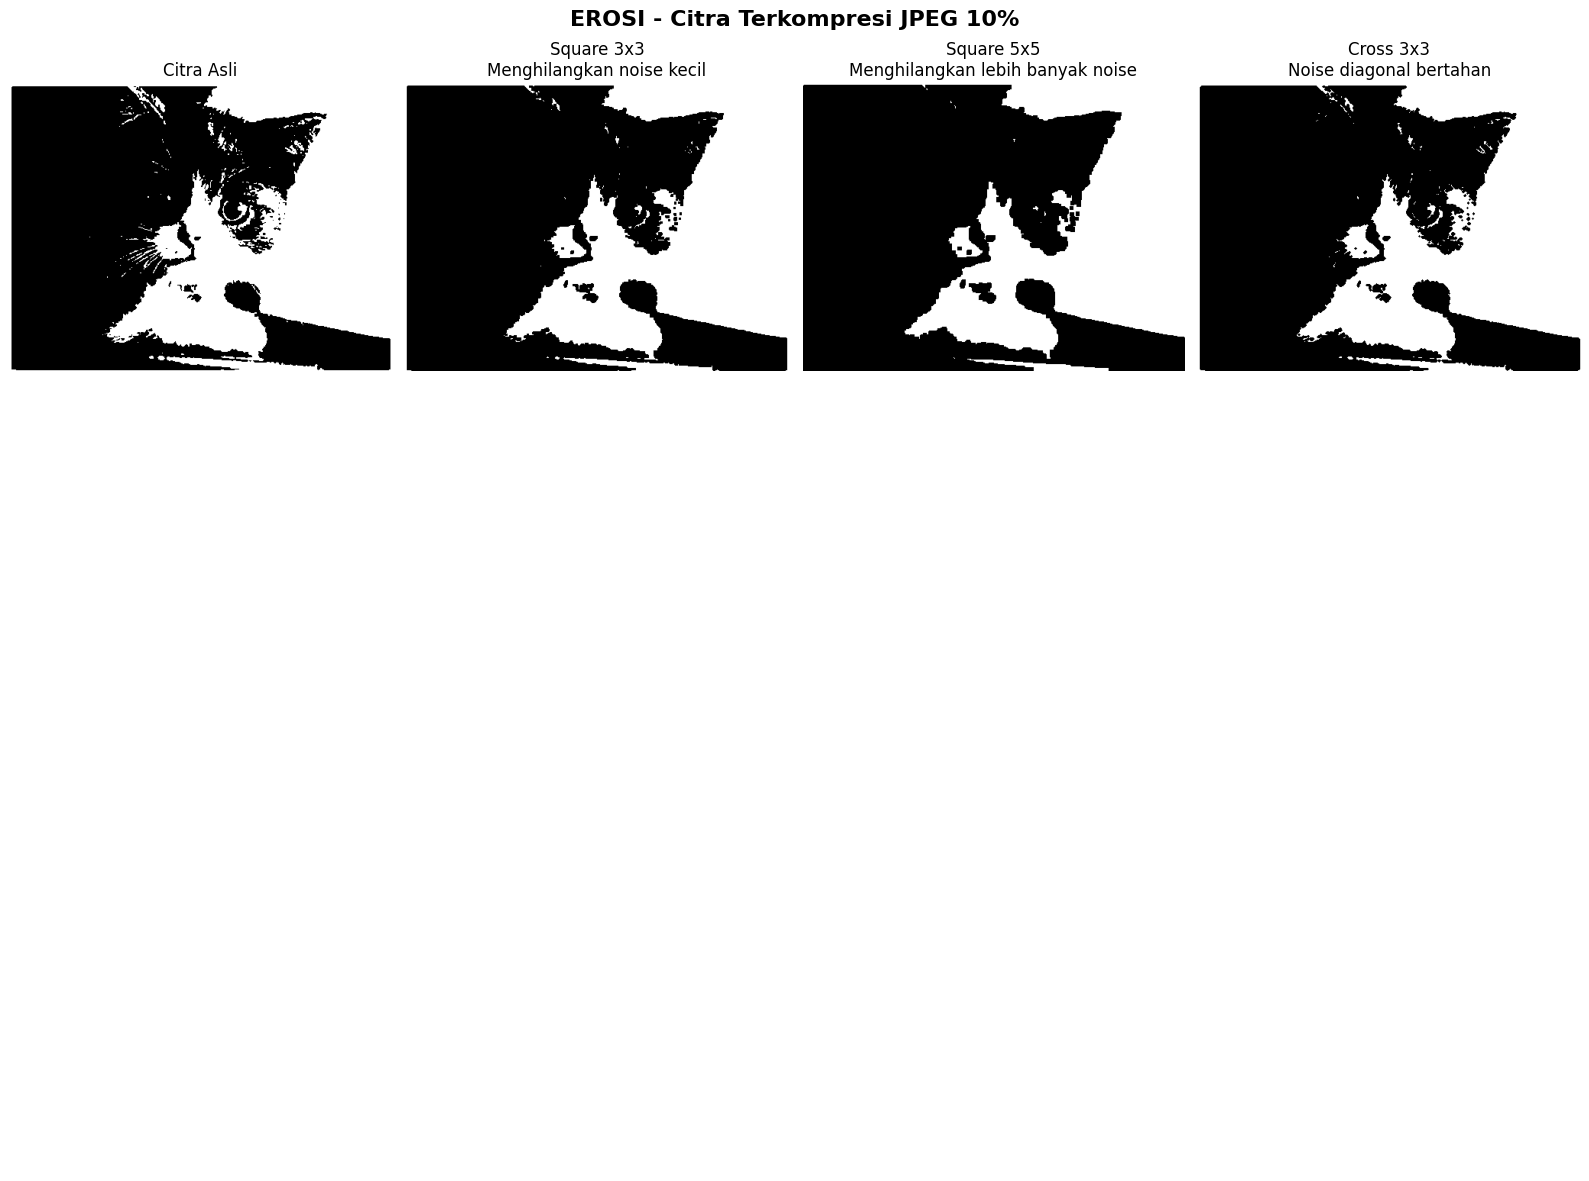


2.2.3 OPENING DAN CLOSING
----------------------------------------
Melakukan opening dan closing pada citra original...
Melakukan opening dan closing pada citra terkompresi...



2.2.4 BOUNDARY EXTRACTION
----------------------------------------
Melakukan boundary extraction pada citra original...
Melakukan boundary extraction pada citra terkompresi...


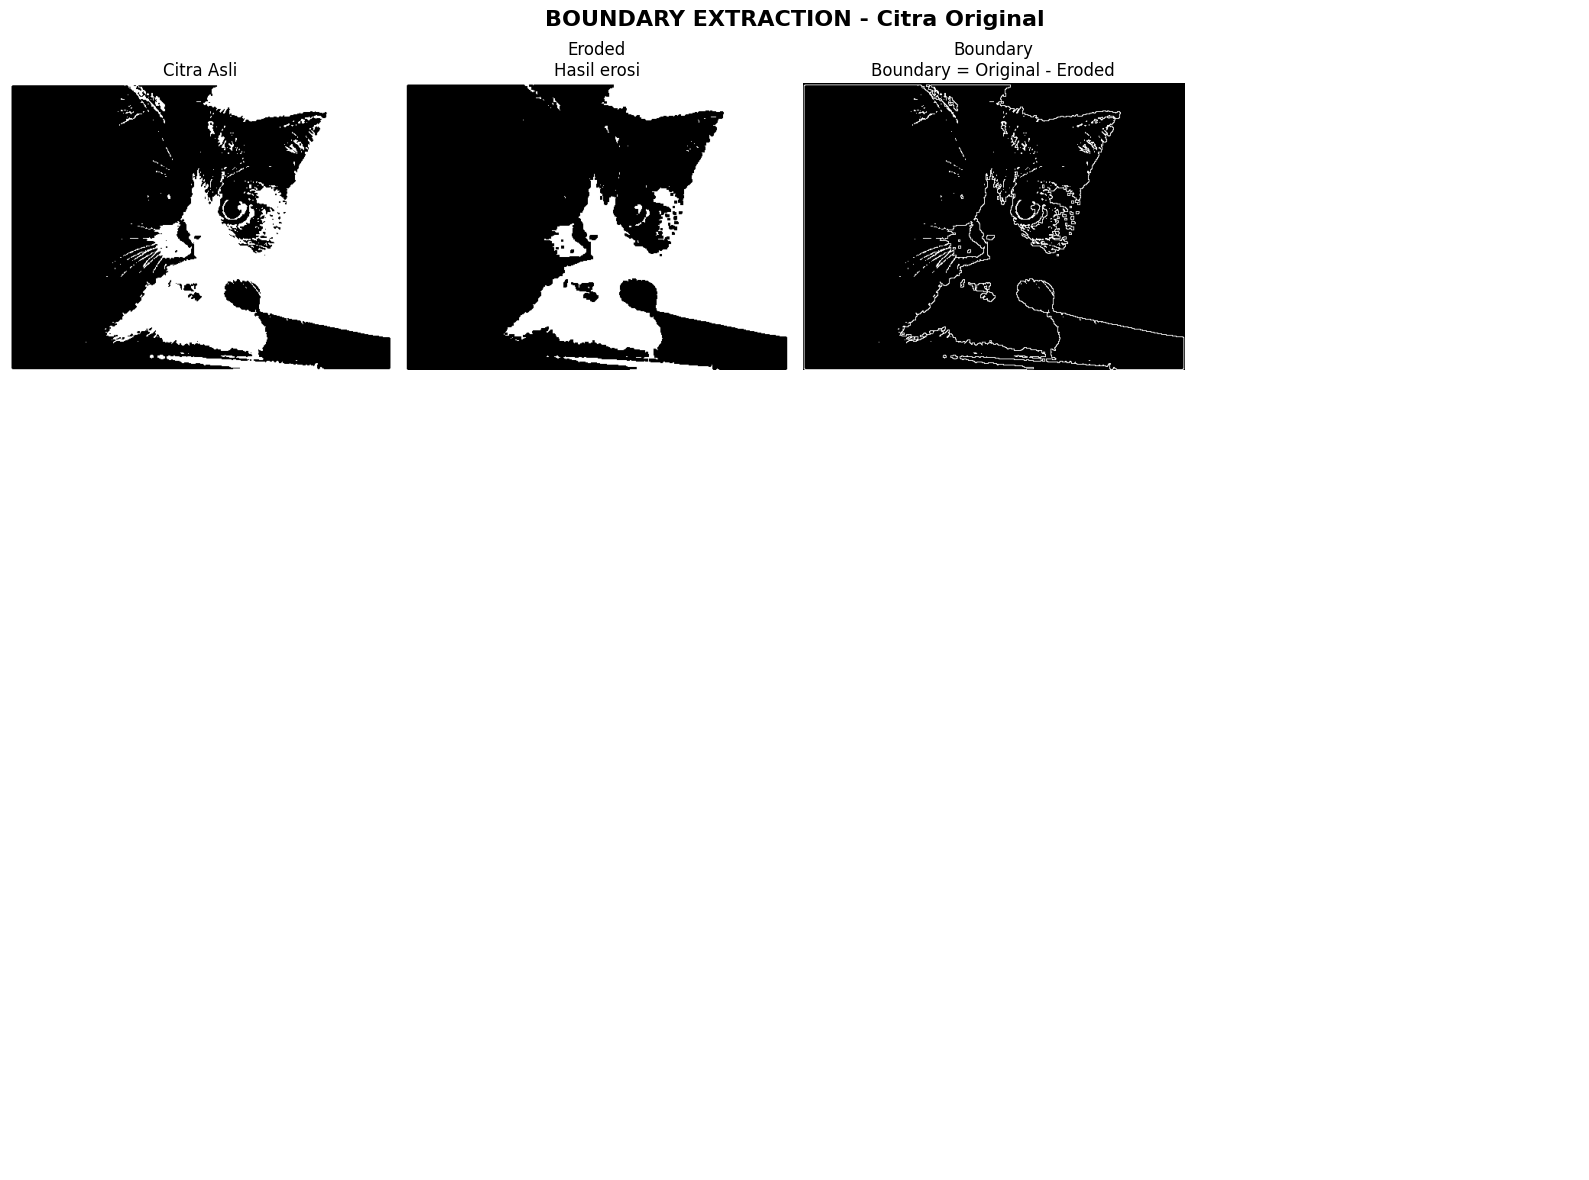

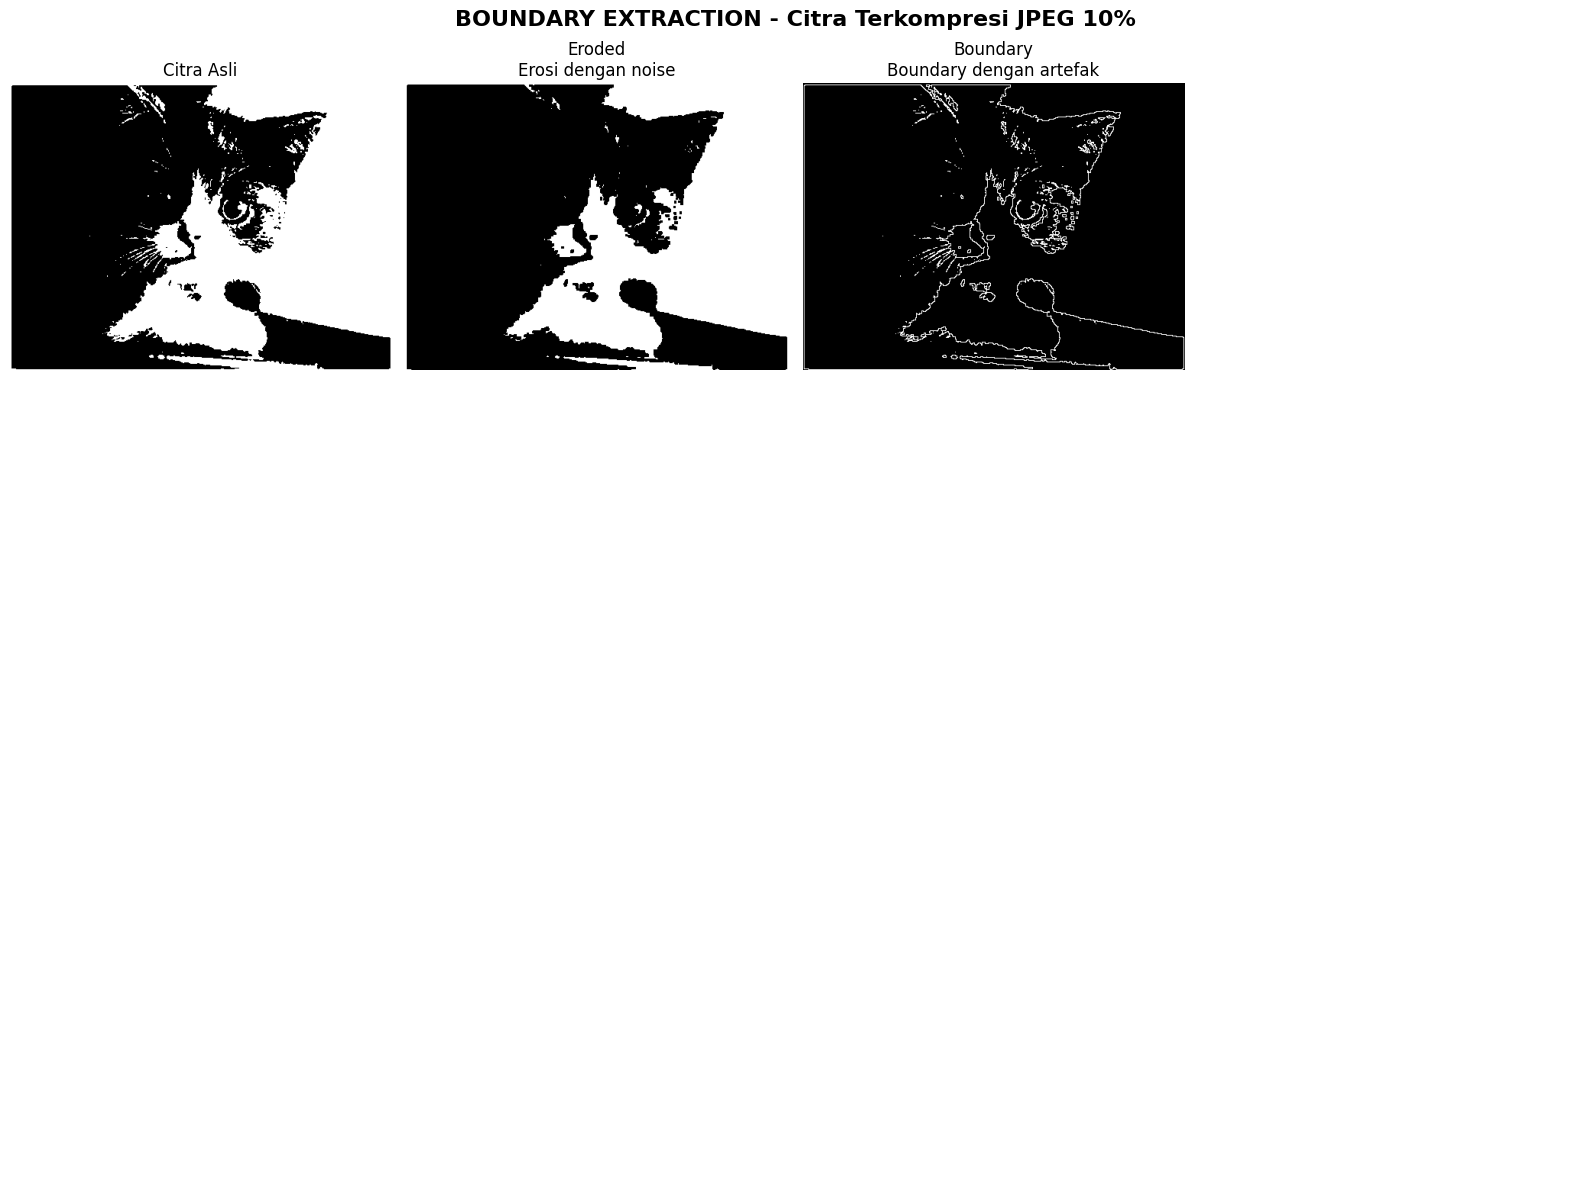


2.2.5 HOLE FILLING - ALGORITMA REKONSTRUKSI
----------------------------------------
Melakukan hole filling pada citra original...
Melakukan hole filling pada citra terkompresi...


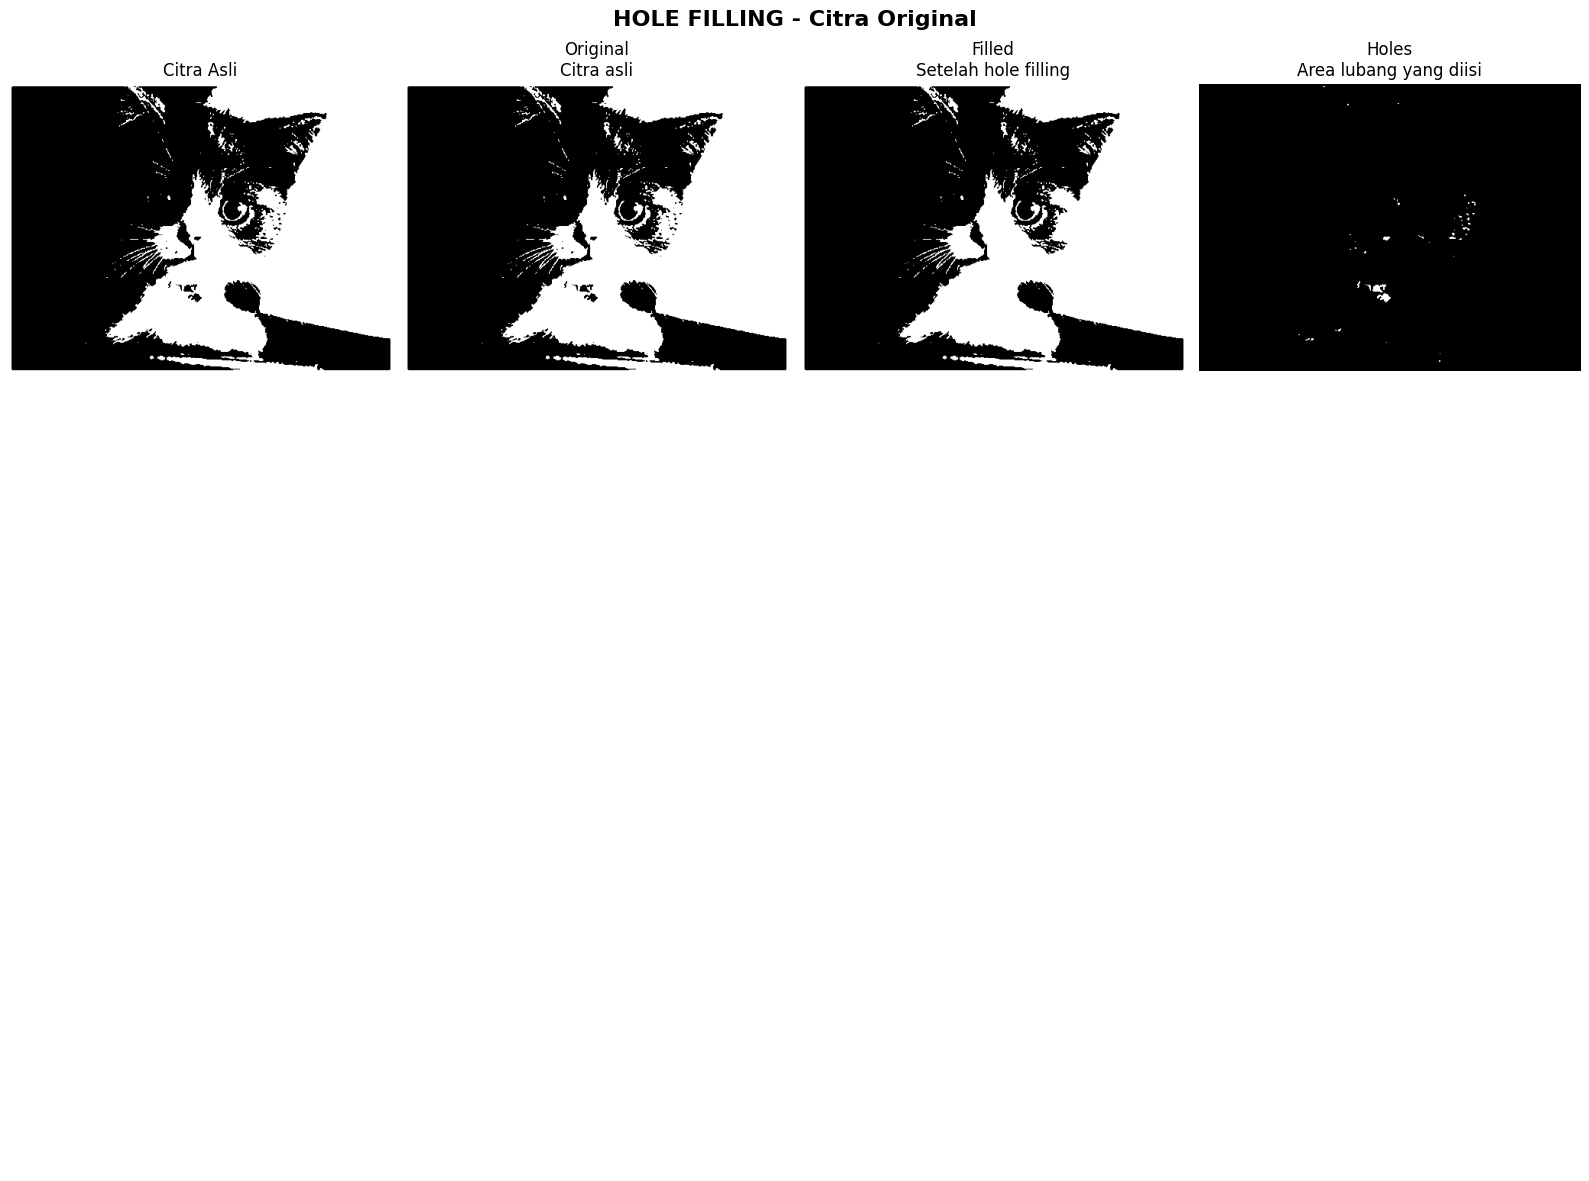

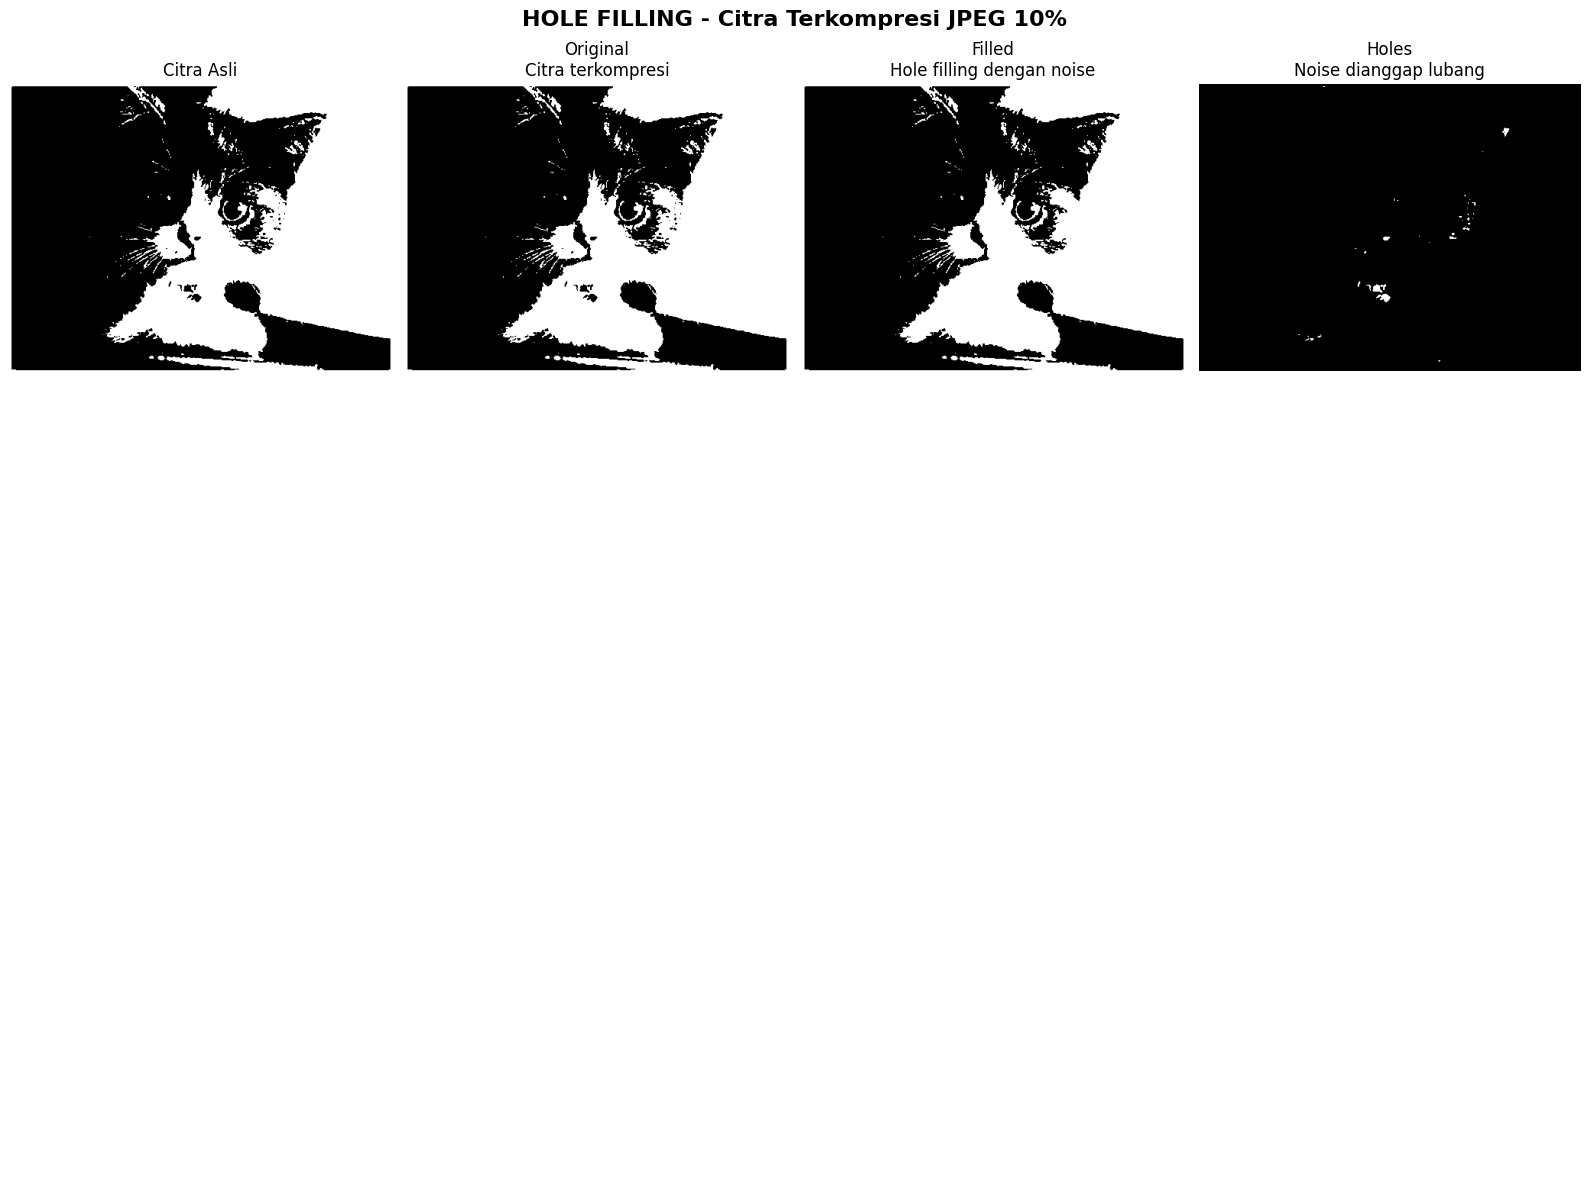


2.3 ANALISIS HASIL OPERASI MORFOLOGI

ANALISIS STRUKTURING ELEMENT:
----------------------------------------
1. SQUARE 3x3:
   - Area pengaruh: seluruh 8 tetangga
   - Cocok untuk operasi umum, preservasi bentuk
   - Efek moderat, tidak terlalu agresif

2. SQUARE 5x5:
   - Area pengaruh lebih besar (24 tetangga)
   - Efek lebih kuat, lebih banyak perubahan
   - Cocok untuk menghilangkan objek kecil

3. CROSS 3x3:
   - Hanya mempengaruhi tetangga vertikal/horizontal
   - Tidak mempengaruhi diagonal
   - Cocok untuk bentuk dengan orientasi tertentu

EFEK OPERASI MORFOLOGI PADA CITRA TERKOMPRESI:
----------------------------------------

ANALISIS PERBEDAAN HASIL OPERASI:
----------------------------------------

DILASI - Square 3x3:
  Pixel berbeda: 2088 (1.11%)


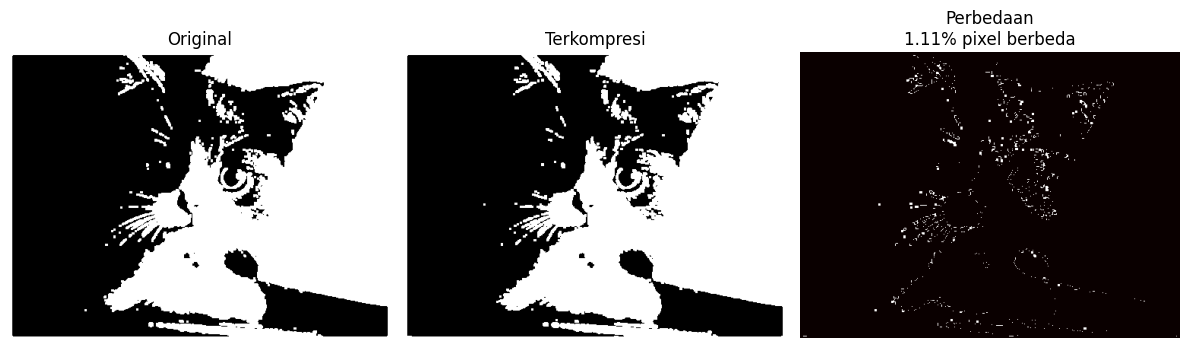


DILASI - Square 5x5:
  Pixel berbeda: 2318 (1.23%)


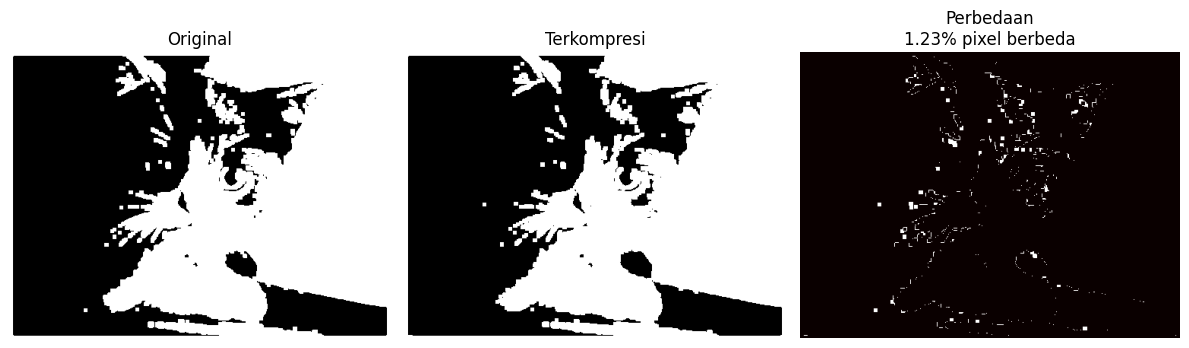


DILASI - Cross 3x3:
  Pixel berbeda: 1854 (0.99%)


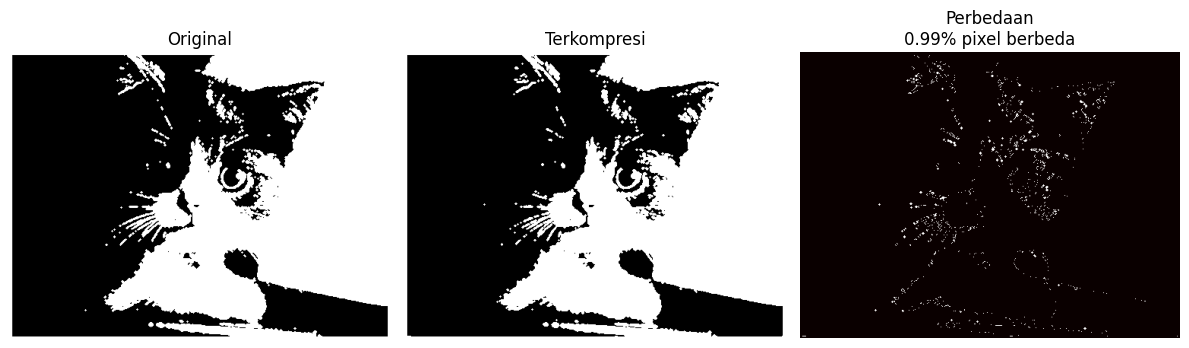


EROSI - Square 3x3:
  Pixel berbeda: 810 (0.43%)


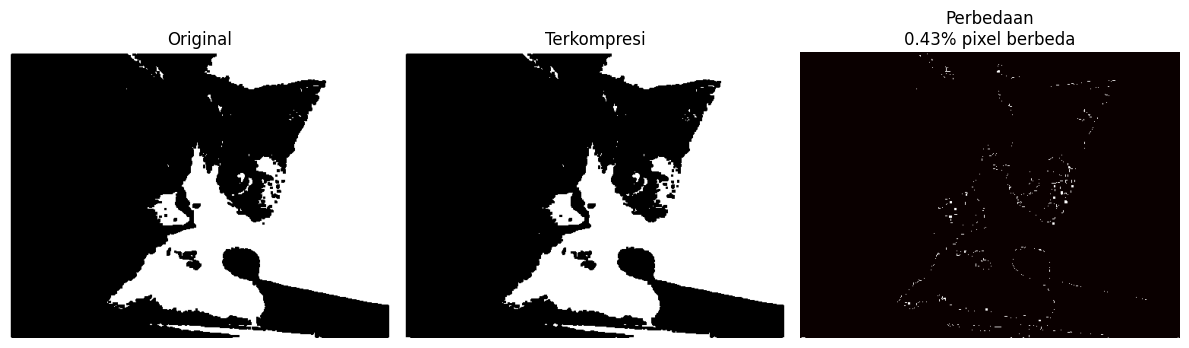


EROSI - Square 5x5:
  Pixel berbeda: 768 (0.41%)


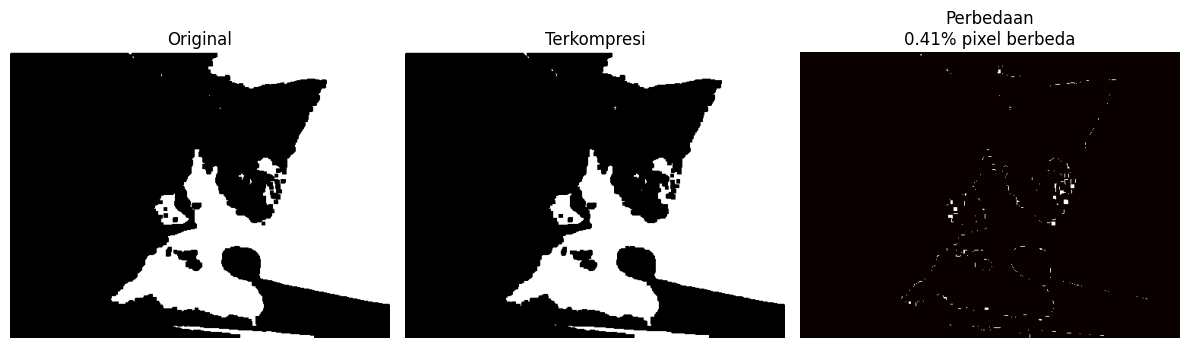


EROSI - Cross 3x3:
  Pixel berbeda: 892 (0.47%)


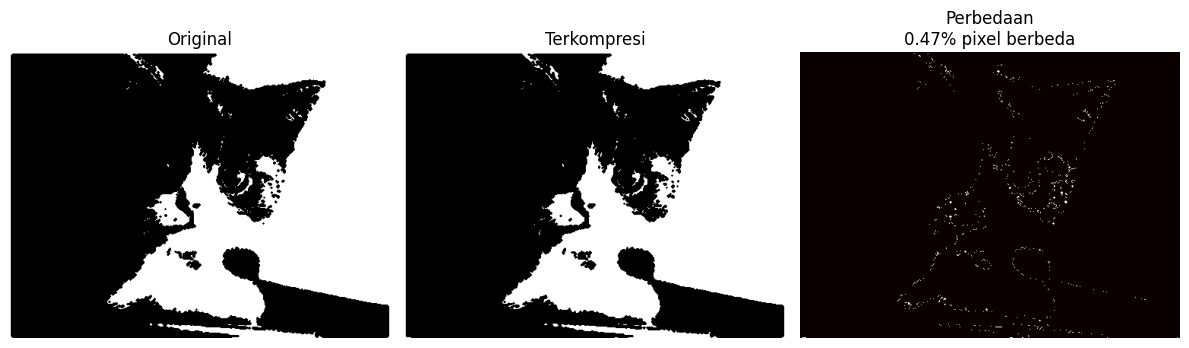


OPENING:
  Pixel berbeda: 911 (0.48%)


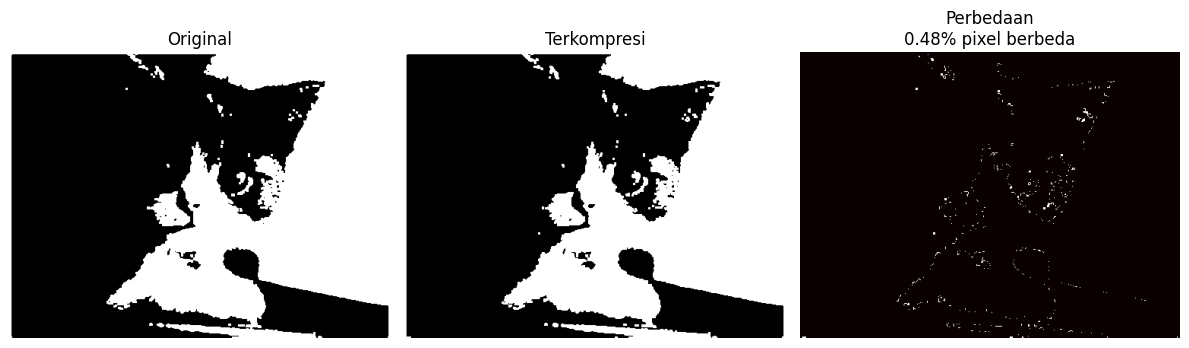


CLOSING:
  Pixel berbeda: 1546 (0.82%)


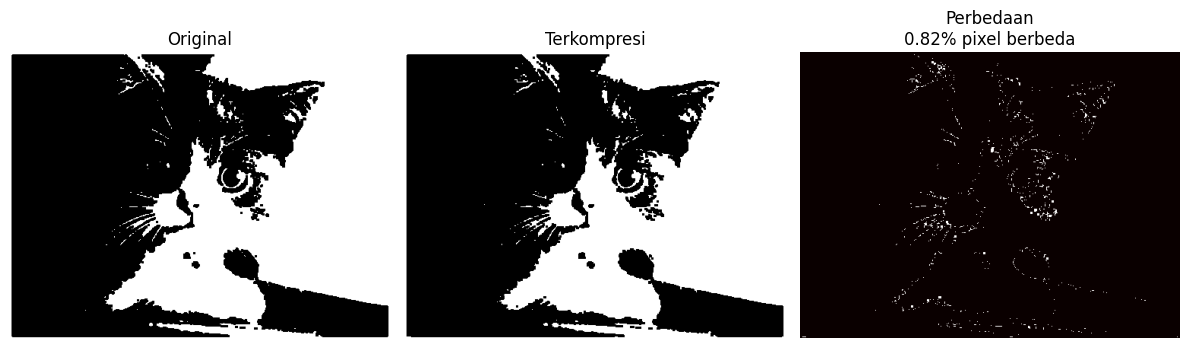


BOUNDARY EXTRACTION:
  Pixel berbeda: 2224 (1.18%)


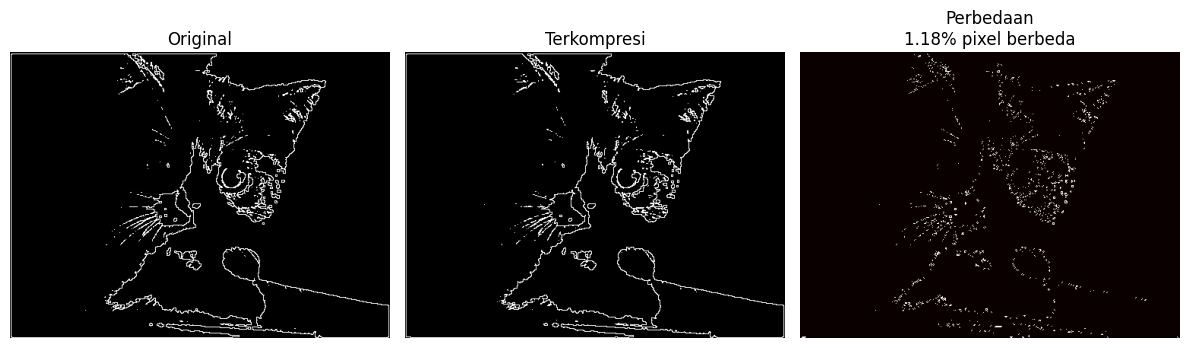


HOLE FILLING:
  Pixel berbeda: 1451 (0.77%)


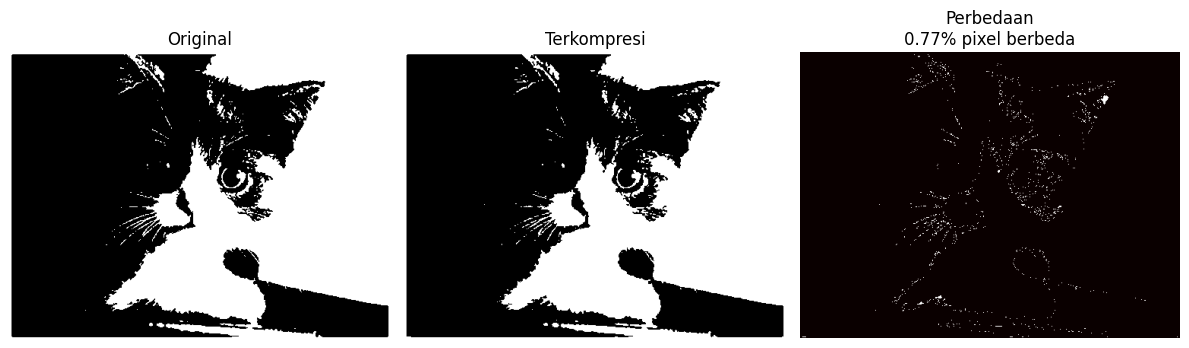


KESIMPULAN PENGARUH KOMPRESI JPEG PADA OPERASI MORFOLOGI:
----------------------------------------

1. NOISE DARI KOMPRESI JPEG:
   - Menyebabkan bintik-bintik putih/hitam acak
   - Menghasilkan tepian yang tidak rata (jagged edges)
   - Membuat area yang seharusnya solid menjadi berlubang

2. DAMPAK PADA OPERASI DILASI:
   - Noise putih ikut membesar bersama objek
   - Menghasilkan area tambahan yang tidak diinginkan
   - Membuat objek tampak 'berbulu' di tepian

3. DAMPAK PADA OPERASI EROSI:
   - Noise putih kecil bertahan, sulit dihilangkan
   - Detail halus mungkin hilang sepenuhnya
   - Objek tipis bisa terputus-putus

4. DAMPAK PADA OPENING & CLOSING:
   - Opening: efektif menghilangkan noise putih kecil
   - Closing: efektif menghilangkan noise hitam kecil
   - Namun juga menghilangkan detail yang valid

5. DAMPAK PADA BOUNDARY EXTRACTION:
   - Boundary menjadi tidak mulus
   - Muncul boundary palsu dari noise
   - Boundary asli menjadi terfragmentasi

6. DAMPAK PADA HOLE FILLI


Menyimpan hasil operasi morfologi...
Hasil disimpan di folder: morphology_results

ANALISIS OPERASI MORFOLOGI SELESAI


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import reconstruction
import os

print("=" * 60)
print("BAGIAN 2: OPERASI MORFOLOGI PADA CITRA BINER TERKOMPRESI")
print("=" * 60)

# ============================================================
# 2.1 Persiapan Citra
# ============================================================
print("\n2.1 PERSIAPAN CITRA BINER TERKOMPRESI")

# Load citra biner original untuk perbandingan
print("Memuat citra biner original...")
img_biner_original = cv2.imread('biner.png', cv2.IMREAD_GRAYSCALE)

# Load citra yang telah dikompresi dengan JPEG 10%
print("Memuat citra terkompresi JPEG 10%...")
if not os.path.exists('biner_jpeg_q10.jpg'):
    print("File biner_jpeg_q10.jpg tidak ditemukan!")
    print("Membuat kompresi JPEG 10% terlebih dahulu...")
    cv2.imwrite('biner_jpeg_q10.jpg', img_biner_original, [cv2.IMWRITE_JPEG_QUALITY, 10])

img_compressed = cv2.imread('biner_jpeg_q10.jpg', cv2.IMREAD_GRAYSCALE)

# Thresholding untuk mendapatkan citra biner sempurna
print("Melakukan thresholding...")
_, img_binary_original = cv2.threshold(img_biner_original, 127, 255, cv2.THRESH_BINARY)
_, img_binary_compressed = cv2.threshold(img_compressed, 127, 255, cv2.THRESH_BINARY)

# Inversi jika diperlukan (biasanya objek putih di latar hitam)
if np.mean(img_binary_original) > 127:
    img_binary_original = cv2.bitwise_not(img_binary_original)
    img_binary_compressed = cv2.bitwise_not(img_binary_compressed)

# Simpan citra hasil thresholding
cv2.imwrite('biner_original_binary.png', img_binary_original)
cv2.imwrite('biner_compressed_binary.jpg', img_binary_compressed)

# Tampilkan perbandingan
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(img_biner_original, cmap='gray')
axes[0, 0].set_title('Citra Biner Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(img_compressed, cmap='gray')
axes[0, 1].set_title('Citra Terkompresi JPEG 10%')
axes[0, 1].axis('off')

axes[1, 0].imshow(img_binary_original, cmap='gray')
axes[1, 0].set_title('Hasil Thresholding - Original')
axes[1, 0].axis('off')

axes[1, 1].imshow(img_binary_compressed, cmap='gray')
axes[1, 1].set_title('Hasil Thresholding - Terkompresi')
axes[1, 1].axis('off')

plt.suptitle('Perbandingan Citra Sebelum dan Sesudah Kompresi', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Analisis perbedaan
print("\nAnalisis Perbedaan Citra:")
print(f"Ukuran original: {img_biner_original.shape}")
print(f"Ukuran terkompresi: {img_compressed.shape}")
print(f"Mean pixel value original: {np.mean(img_biner_original):.2f}")
print(f"Mean pixel value terkompresi: {np.mean(img_compressed):.2f}")

# Hitung noise yang ditambahkan oleh kompresi
noise = cv2.absdiff(img_binary_original, img_binary_compressed)
noise_percentage = np.sum(noise > 0) / (img_binary_original.shape[0] * img_binary_original.shape[1]) * 100
print(f"Persentase pixel berubah akibat kompresi: {noise_percentage:.2f}%")

# ============================================================
# 2.2 Implementasi Operasi Morfologi
# ============================================================
print("\n" + "=" * 60)
print("2.2 IMPLEMENTASI OPERASI MORFOLOGI")
print("=" * 60)

# Definisikan structuring elements
print("\nMembuat structuring elements...")
se_square_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
se_square_5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
se_cross_3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

print(f"\nStructuring Element 3x3 persegi:\n{se_square_3}")
print(f"\nStructuring Element 5x5 persegi:\n{se_square_5}")
print(f"\nStructuring Element Cross 3x3:\n{se_cross_3}")

# Fungsi untuk menampilkan hasil operasi
def display_morphology_results(original, results_dict, title):
    """Fungsi untuk menampilkan hasil operasi morfologi"""
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    axes = axes.ravel()

    # Tampilkan original
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title('Citra Asli')
    axes[0].axis('off')

    # Tampilkan hasil operasi
    idx = 1
    for key, (result, desc) in results_dict.items():
        axes[idx].imshow(result, cmap='gray')
        axes[idx].set_title(f'{key}\n{desc}')
        axes[idx].axis('off')
        idx += 1

    # Matikan axes yang tidak digunakan
    for i in range(idx, len(axes)):
        axes[i].axis('off')

    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# 2.2.1 DILASI
print("\n2.2.1 OPERASI DILASI")
print("-" * 40)

dilation_results_original = {}
dilation_results_compressed = {}

# Dilasi pada citra original
print("Melakukan dilasi pada citra original...")
dilation_original_square3 = cv2.dilate(img_binary_original, se_square_3, iterations=1)
dilation_original_square5 = cv2.dilate(img_binary_original, se_square_5, iterations=1)
dilation_original_cross3 = cv2.dilate(img_binary_original, se_cross_3, iterations=1)

dilation_results_original['Square 3x3'] = (dilation_original_square3, "Memperbesar objek")
dilation_results_original['Square 5x5'] = (dilation_original_square5, "Efek lebih kuat")
dilation_results_original['Cross 3x3'] = (dilation_original_cross3, "Arah diagonal terbatas")

# Dilasi pada citra terkompresi
print("Melakukan dilasi pada citra terkompresi...")
dilation_compressed_square3 = cv2.dilate(img_binary_compressed, se_square_3, iterations=1)
dilation_compressed_square5 = cv2.dilate(img_binary_compressed, se_square_5, iterations=1)
dilation_compressed_cross3 = cv2.dilate(img_binary_compressed, se_cross_3, iterations=1)

dilation_results_compressed['Square 3x3'] = (dilation_compressed_square3, "Memperbesar objek + noise")
dilation_results_compressed['Square 5x5'] = (dilation_compressed_square5, "Noise ikut membesar")
dilation_results_compressed['Cross 3x3'] = (dilation_compressed_cross3, "Pengaruh noise diagonal")

# Tampilkan hasil
display_morphology_results(img_binary_original, dilation_results_original,
                          'DILASI - Citra Original')
display_morphology_results(img_binary_compressed, dilation_results_compressed,
                          'DILASI - Citra Terkompresi JPEG 10%')

# 2.2.2 EROSI
print("\n2.2.2 OPERASI EROSI")
print("-" * 40)

erosion_results_original = {}
erosion_results_compressed = {}

# Erosi pada citra original
print("Melakukan erosi pada citra original...")
erosion_original_square3 = cv2.erode(img_binary_original, se_square_3, iterations=1)
erosion_original_square5 = cv2.erode(img_binary_original, se_square_5, iterations=1)
erosion_original_cross3 = cv2.erode(img_binary_original, se_cross_3, iterations=1)

erosion_results_original['Square 3x3'] = (erosion_original_square3, "Mengecilkan objek")
erosion_results_original['Square 5x5'] = (erosion_original_square5, "Efek lebih kuat")
erosion_results_original['Cross 3x3'] = (erosion_original_cross3, "Menghilangkan ujung tipis")

# Erosi pada citra terkompresi
print("Melakukan erosi pada citra terkompresi...")
erosion_compressed_square3 = cv2.erode(img_binary_compressed, se_square_3, iterations=1)
erosion_compressed_square5 = cv2.erode(img_binary_compressed, se_square_5, iterations=1)
erosion_compressed_cross3 = cv2.erode(img_binary_compressed, se_cross_3, iterations=1)

erosion_results_compressed['Square 3x3'] = (erosion_compressed_square3, "Menghilangkan noise kecil")
erosion_results_compressed['Square 5x5'] = (erosion_compressed_square5, "Menghilangkan lebih banyak noise")
erosion_results_compressed['Cross 3x3'] = (erosion_compressed_cross3, "Noise diagonal bertahan")

# Tampilkan hasil
display_morphology_results(img_binary_original, erosion_results_original,
                          'EROSI - Citra Original')
display_morphology_results(img_binary_compressed, erosion_results_compressed,
                          'EROSI - Citra Terkompresi JPEG 10%')

# 2.2.3 OPENING dan CLOSING
print("\n2.2.3 OPENING DAN CLOSING")
print("-" * 40)

opening_closing_results_original = {}
opening_closing_results_compressed = {}

# Opening dan Closing pada citra original
print("Melakukan opening dan closing pada citra original...")
opening_original = cv2.morphologyEx(img_binary_original, cv2.MORPH_OPEN, se_square_3)
closing_original = cv2.morphologyEx(img_binary_original, cv2.MORPH_CLOSE, se_square_3)

opening_closing_results_original['Opening'] = (opening_original, "Hilangkan noise putih kecil")
opening_closing_results_original['Closing'] = (closing_original, "Hilangkan noise hitam kecil")

# Opening dan Closing pada citra terkompresi
print("Melakukan opening dan closing pada citra terkompresi...")
opening_compressed = cv2.morphologyEx(img_binary_compressed, cv2.MORPH_OPEN, se_square_3)
closing_compressed = cv2.morphologyEx(img_binary_compressed, cv2.MORPH_CLOSE, se_square_3)

opening_closing_results_compressed['Opening'] = (opening_compressed, "Kurangi noise JPEG")
opening_closing_results_compressed['Closing'] = (closing_compressed, "Isi celah akibat kompresi")

# Tampilkan hasil
display_morphology_results(img_binary_original, opening_closing_results_original,
                          'OPENING & CLOSING - Citra Original')
display_morphology_results(img_binary_compressed, opening_closing_results_compressed,
                          'OPENING & CLOSING - Citra Terkompresi JPEG 10%')

# 2.2.4 BOUNDARY EXTRACTION
print("\n2.2.4 BOUNDARY EXTRACTION")
print("-" * 40)

boundary_results_original = {}
boundary_results_compressed = {}

# Boundary extraction pada citra original
print("Melakukan boundary extraction pada citra original...")
eroded_original = cv2.erode(img_binary_original, se_square_3)
boundary_original = cv2.subtract(img_binary_original, eroded_original)

boundary_results_original['Eroded'] = (eroded_original, "Hasil erosi")
boundary_results_original['Boundary'] = (boundary_original, "Boundary = Original - Eroded")

# Boundary extraction pada citra terkompresi
print("Melakukan boundary extraction pada citra terkompresi...")
eroded_compressed = cv2.erode(img_binary_compressed, se_square_3)
boundary_compressed = cv2.subtract(img_binary_compressed, eroded_compressed)

boundary_results_compressed['Eroded'] = (eroded_compressed, "Erosi dengan noise")
boundary_results_compressed['Boundary'] = (boundary_compressed, "Boundary dengan artefak")

# Tampilkan hasil
display_morphology_results(img_binary_original, boundary_results_original,
                          'BOUNDARY EXTRACTION - Citra Original')
display_morphology_results(img_binary_compressed, boundary_results_compressed,
                          'BOUNDARY EXTRACTION - Citra Terkompresi JPEG 10%')

# 2.2.5 HOLE FILLING (Menggunakan algoritma rekonstruksi)
print("\n2.2.5 HOLE FILLING - ALGORITMA REKONSTRUKSI")
print("-" * 40)

# Implementasi hole filling menggunakan rekonstruksi morfologi
def hole_filling(image):
    """Implementasi hole filling menggunakan rekonstruksi morfologi"""
    # Inversi citra
    img_inv = cv2.bitwise_not(image)

    # Buat marker (seed)
    marker = np.zeros_like(image)
    marker[0, :] = 255
    marker[-1, :] = 255
    marker[:, 0] = 255
    marker[:, -1] = 255

    # Rekonstruksi morfologi
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    while True:
        marker_temp = marker.copy()
        marker = cv2.dilate(marker, kernel)
        marker = cv2.bitwise_and(marker, img_inv)

        # Cek konvergensi
        if np.array_equal(marker, marker_temp):
            break

    # Hasil akhir
    result = cv2.bitwise_not(marker)
    return result

hole_filling_results_original = {}
hole_filling_results_compressed = {}

print("Melakukan hole filling pada citra original...")
filled_original = hole_filling(img_binary_original)
holes_original = cv2.bitwise_xor(img_binary_original, filled_original)

hole_filling_results_original['Original'] = (img_binary_original, "Citra asli")
hole_filling_results_original['Filled'] = (filled_original, "Setelah hole filling")
hole_filling_results_original['Holes'] = (holes_original, "Area lubang yang diisi")

print("Melakukan hole filling pada citra terkompresi...")
filled_compressed = hole_filling(img_binary_compressed)
holes_compressed = cv2.bitwise_xor(img_binary_compressed, filled_compressed)

hole_filling_results_compressed['Original'] = (img_binary_compressed, "Citra terkompresi")
hole_filling_results_compressed['Filled'] = (filled_compressed, "Hole filling dengan noise")
hole_filling_results_compressed['Holes'] = (holes_compressed, "Noise dianggap lubang")

# Tampilkan hasil
display_morphology_results(img_binary_original, hole_filling_results_original,
                          'HOLE FILLING - Citra Original')
display_morphology_results(img_binary_compressed, hole_filling_results_compressed,
                          'HOLE FILLING - Citra Terkompresi JPEG 10%')

# ============================================================
# 2.3 Analisis Hasil
# ============================================================
print("\n" + "=" * 60)
print("2.3 ANALISIS HASIL OPERASI MORFOLOGI")
print("=" * 60)

print("\nANALISIS STRUKTURING ELEMENT:")
print("-" * 40)
print("1. SQUARE 3x3:")
print("   - Area pengaruh: seluruh 8 tetangga")
print("   - Cocok untuk operasi umum, preservasi bentuk")
print("   - Efek moderat, tidak terlalu agresif")

print("\n2. SQUARE 5x5:")
print("   - Area pengaruh lebih besar (24 tetangga)")
print("   - Efek lebih kuat, lebih banyak perubahan")
print("   - Cocok untuk menghilangkan objek kecil")

print("\n3. CROSS 3x3:")
print("   - Hanya mempengaruhi tetangga vertikal/horizontal")
print("   - Tidak mempengaruhi diagonal")
print("   - Cocok untuk bentuk dengan orientasi tertentu")

print("\nEFEK OPERASI MORFOLOGI PADA CITRA TERKOMPRESI:")
print("-" * 40)

# Analisis kuantitatif
def analyze_differences(img1, img2, operation_name):
    """Analisis perbedaan antara hasil operasi pada citra original dan terkompresi"""
    diff = cv2.absdiff(img1, img2)
    diff_pixels = np.sum(diff > 0)
    total_pixels = img1.shape[0] * img1.shape[1]
    percentage = (diff_pixels / total_pixels) * 100

    print(f"\n{operation_name}:")
    print(f"  Pixel berbeda: {diff_pixels} ({percentage:.2f}%)")

    # Tampilkan area perbedaan
    if diff_pixels > 0:
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))

        axes[0].imshow(img1, cmap='gray')
        axes[0].set_title('Original')
        axes[0].axis('off')

        axes[1].imshow(img2, cmap='gray')
        axes[1].set_title('Terkompresi')
        axes[1].axis('off')

        axes[2].imshow(diff, cmap='hot')
        axes[2].set_title(f'Perbedaan\n{percentage:.2f}% pixel berbeda')
        axes[2].axis('off')

        plt.tight_layout()
        plt.show()

    return percentage

# Analisis untuk setiap operasi
print("\nANALISIS PERBEDAAN HASIL OPERASI:")
print("-" * 40)

# 1. Dilasi
diff_dilate_sq3 = analyze_differences(dilation_original_square3, dilation_compressed_square3,
                                     "DILASI - Square 3x3")
diff_dilate_sq5 = analyze_differences(dilation_original_square5, dilation_compressed_square5,
                                     "DILASI - Square 5x5")
diff_dilate_cr3 = analyze_differences(dilation_original_cross3, dilation_compressed_cross3,
                                     "DILASI - Cross 3x3")

# 2. Erosi
diff_erode_sq3 = analyze_differences(erosion_original_square3, erosion_compressed_square3,
                                    "EROSI - Square 3x3")
diff_erode_sq5 = analyze_differences(erosion_original_square5, erosion_compressed_square5,
                                    "EROSI - Square 5x5")
diff_erode_cr3 = analyze_differences(erosion_original_cross3, erosion_compressed_cross3,
                                    "EROSI - Cross 3x3")

# 3. Opening & Closing
diff_open = analyze_differences(opening_original, opening_compressed, "OPENING")
diff_close = analyze_differences(closing_original, closing_compressed, "CLOSING")

# 4. Boundary Extraction
diff_boundary = analyze_differences(boundary_original, boundary_compressed, "BOUNDARY EXTRACTION")

# 5. Hole Filling
diff_hole_fill = analyze_differences(filled_original, filled_compressed, "HOLE FILLING")

print("\nKESIMPULAN PENGARUH KOMPRESI JPEG PADA OPERASI MORFOLOGI:")
print("-" * 40)
print("\n1. NOISE DARI KOMPRESI JPEG:")
print("   - Menyebabkan bintik-bintik putih/hitam acak")
print("   - Menghasilkan tepian yang tidak rata (jagged edges)")
print("   - Membuat area yang seharusnya solid menjadi berlubang")

print("\n2. DAMPAK PADA OPERASI DILASI:")
print("   - Noise putih ikut membesar bersama objek")
print("   - Menghasilkan area tambahan yang tidak diinginkan")
print("   - Membuat objek tampak 'berbulu' di tepian")

print("\n3. DAMPAK PADA OPERASI EROSI:")
print("   - Noise putih kecil bertahan, sulit dihilangkan")
print("   - Detail halus mungkin hilang sepenuhnya")
print("   - Objek tipis bisa terputus-putus")

print("\n4. DAMPAK PADA OPENING & CLOSING:")
print("   - Opening: efektif menghilangkan noise putih kecil")
print("   - Closing: efektif menghilangkan noise hitam kecil")
print("   - Namun juga menghilangkan detail yang valid")

print("\n5. DAMPAK PADA BOUNDARY EXTRACTION:")
print("   - Boundary menjadi tidak mulus")
print("   - Muncul boundary palsu dari noise")
print("   - Boundary asli menjadi terfragmentasi")

print("\n6. DAMPAK PADA HOLE FILLING:")
print("   - Noise hitam dianggap sebagai lubang")
print("   - Area kecil terisi tidak semestinya")
print("   - Rekonstruksi menjadi tidak akurat")

print("\nREKOMENDASI UNTUK CITRA TERKOMPRESI:")
print("-" * 40)
print("1. Gunakan preprocessing dengan filter median sebelum morfologi")
print("2. Pilih structuring element yang sesuai dengan ukuran noise")
print("3. Pertimbangkan sequence operasi: opening sebelum closing")
print("4. Untuk citra terkompresi berat, pertimbangkan re-kompresi dengan kualitas lebih tinggi")
print("5. Evaluasi hasil secara visual dan kuantitatif")

# Tampilkan ringkasan perbandingan
print("\nRINGKASAN PERBANDINGAN:")
print("-" * 40)

operations = ['Dilasi 3x3', 'Dilasi 5x5', 'Dilasi Cross',
              'Erosi 3x3', 'Erosi 5x5', 'Erosi Cross',
              'Opening', 'Closing', 'Boundary', 'Hole Fill']

differences = [diff_dilate_sq3, diff_dilate_sq5, diff_dilate_cr3,
               diff_erode_sq3, diff_erode_sq5, diff_erode_cr3,
               diff_open, diff_close, diff_boundary, diff_hole_fill]

# Buat grafik perbandingan
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(operations, differences, color='skyblue')
ax.set_xlabel('Persentase Pixel Berbeda (%)')
ax.set_title('Perbandingan Pengaruh Kompresi pada Operasi Morfologi')
ax.invert_yaxis()  # Urutan terbalik untuk pembacaan yang lebih baik

# Tambahkan nilai pada bar
for bar, diff in zip(bars, differences):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
            f'{diff:.2f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Simpan hasil untuk dokumentasi
print("\nMenyimpan hasil operasi morfologi...")
results_dir = 'morphology_results'
os.makedirs(results_dir, exist_ok=True)

# Simpan semua hasil
cv2.imwrite(f'{results_dir}/original_binary.png', img_binary_original)
cv2.imwrite(f'{results_dir}/compressed_binary.jpg', img_binary_compressed)

# Simpan hasil operasi pada citra terkompresi
operations_dict = {
    'dilation_sq3': dilation_compressed_square3,
    'dilation_sq5': dilation_compressed_square5,
    'dilation_cross3': dilation_compressed_cross3,
    'erosion_sq3': erosion_compressed_square3,
    'erosion_sq5': erosion_compressed_square5,
    'erosion_cross3': erosion_compressed_cross3,
    'opening': opening_compressed,
    'closing': closing_compressed,
    'boundary': boundary_compressed,
    'hole_filled': filled_compressed
}

for name, img in operations_dict.items():
    cv2.imwrite(f'{results_dir}/{name}.png', img)

print(f"Hasil disimpan di folder: {results_dir}")
print("\n" + "=" * 60)
print("ANALISIS OPERASI MORFOLOGI SELESAI")
print("=" * 60)


PILIH MODE EKSEKUSI

1. Upload gambar sendiri (REKOMENDASI)
2. Gunakan dokumen sample
--------------------------------------------------------------------------------

SISTEM OCR DENGAN KOMPRESI DAN OPERASI MORFOLOGI
Mode: Upload Gambar Sendiri
UPLOAD CITRA DOKUMEN

Silakan pilih file gambar dokumen Anda...
Format yang didukung: JPG, JPEG, PNG, BMP, TIFF
--------------------------------------------------------------------------------


Saving dokumen.jpg to dokumen.jpg

✓ File berhasil di-upload: dokumen.jpg
✓ Ukuran gambar: 194 x 259 pixels
✓ Mode: Grayscale



MEMULAI ANALISIS...
ANALISIS SISTEM OCR DENGAN KOMPRESI DAN OPERASI MORFOLOGI

1. Visualisasi Pipeline OCR...


/tmp/ipython-input-3644591858.py:36: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  pil_image = Image.fromarray(image, mode='L')



2. Analisis Performa Kompresi...

RINGKASAN HASIL ANALISIS
Quality    Ratio      Size(KB)     Success      Chars     
--------------------------------------------------------------------------------
95         3.73       13.16        0.00         0         
80         5.93       8.28         0.00         0         
60         7.97       6.15         0.00         0         
40         11.40      4.31         0.00         0         
20         18.93      2.59         2.81         4         

3. Membuat Grafik Analisis...



4. Analisis Trade-off...


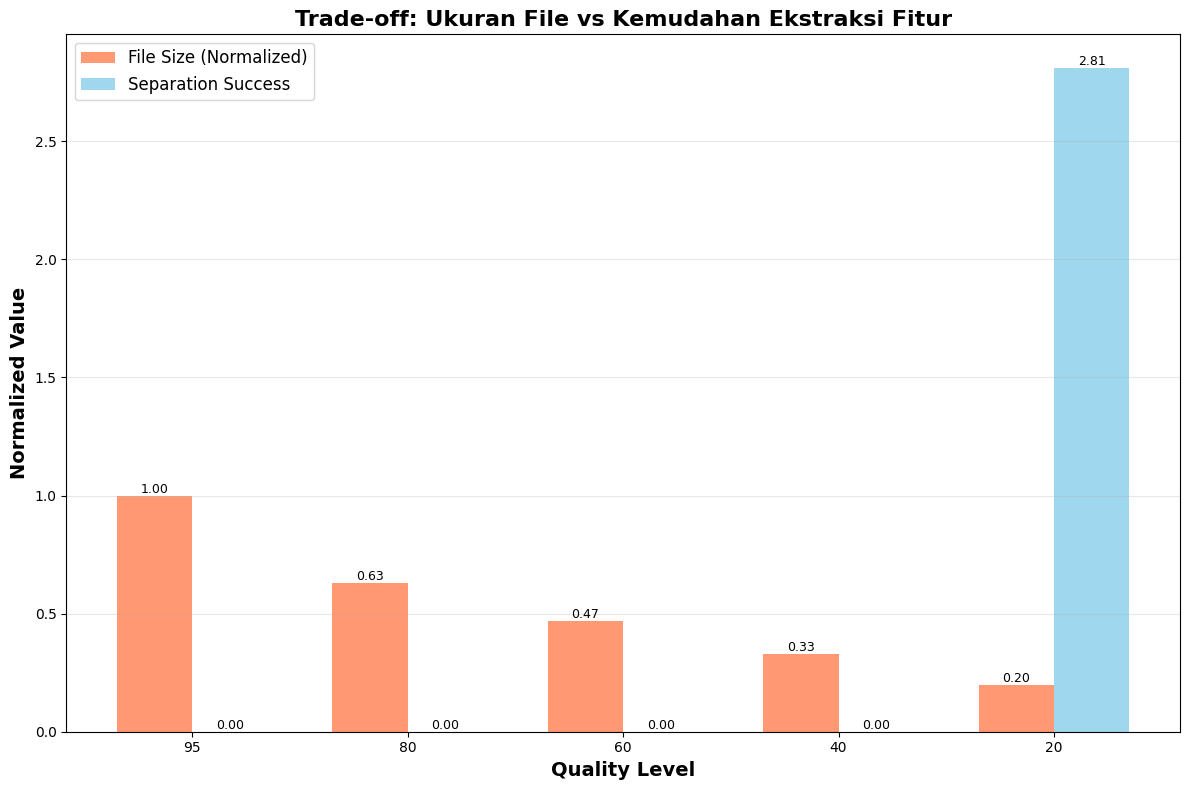


KESIMPULAN

✓ Kualitas terbaik untuk ekstraksi: 20
  - Success rate: 281.20%
  - File size: 2.59 KB

✓ Kompresi tertinggi: Quality 20
  - Compression ratio: 18.93x
  - Success rate: 281.20%

✓ Rata-rata peningkatan dari operasi morfologi: -280.13%


✓ Analisis selesai! File visualisasi telah disimpan.
  - ocr_pipeline_visualization.png
  - performance_analysis.png
  - tradeoff_analysis.png


In [ ]:
# ============================================================================
# SISTEM OCR SEDERHANA DENGAN KOMPRESI DAN OPERASI MORFOLOGI
# ============================================================================

# Install dependencies jika diperlukan
# !pip install opencv-python-headless pillow matplotlib numpy scikit-image

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import os
from collections import defaultdict

# ============================================================================
# BAGIAN 1: FUNGSI KOMPRESI DOKUMEN
# ============================================================================

def compress_image(image, quality=95, format='JPEG'):
    """
    Kompresi citra menggunakan berbagai tingkat kualitas

    Parameters:
    - image: numpy array (grayscale atau RGB)
    - quality: tingkat kualitas kompresi (1-100)
    - format: format kompresi ('JPEG' atau 'PNG')

    Returns:
    - compressed_image: citra terkompresi
    - compression_ratio: rasio kompresi
    - file_size: ukuran file dalam bytes
    """
    # Konversi ke PIL Image
    if len(image.shape) == 2:
        pil_image = Image.fromarray(image, mode='L')
    else:
        pil_image = Image.fromarray(image)

    # Ukuran original
    original_size = image.nbytes

    # Kompresi ke buffer
    buffer = io.BytesIO()
    if format == 'JPEG':
        pil_image.save(buffer, format='JPEG', quality=quality, optimize=True)
    elif format == 'PNG':
        pil_image.save(buffer, format='PNG', compress_level=int((100-quality)/10))

    # Ukuran compressed
    compressed_size = buffer.tell()

    # Load kembali dari buffer
    buffer.seek(0)
    compressed_pil = Image.open(buffer)
    compressed_image = np.array(compressed_pil)

    # Hitung rasio kompresi
    compression_ratio = original_size / compressed_size if compressed_size > 0 else 0

    return compressed_image, compression_ratio, compressed_size


# ============================================================================
# BAGIAN 2: OPERASI MORFOLOGI
# ============================================================================

def remove_noise_opening(image, kernel_size=(3, 3)):
    """
    Menghilangkan noise menggunakan operasi Opening (Erosi + Dilasi)
    """
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    opened = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    return opened


def connect_broken_chars_closing(image, kernel_size=(3, 3)):
    """
    Menghubungkan karakter yang terputus menggunakan operasi Closing (Dilasi + Erosi)
    """
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    closed = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    return closed


def separate_text_lines(image, kernel_width=50):
    """
    Memisahkan baris teks menggunakan erosi horizontal
    """
    # Kernel horizontal untuk memisahkan baris
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_width, 1))
    eroded = cv2.erode(image, kernel, iterations=1)

    # Deteksi baris menggunakan proyeksi horizontal
    horizontal_projection = np.sum(eroded, axis=1)

    # Temukan puncak untuk lokasi baris
    threshold = np.max(horizontal_projection) * 0.3
    line_positions = np.where(horizontal_projection > threshold)[0]

    return eroded, horizontal_projection, line_positions


def morphological_pipeline(image, noise_kernel=(3,3), connect_kernel=(3,3), line_width=50):
    """
    Pipeline lengkap operasi morfologi
    """
    results = {}

    # 1. Remove noise
    denoised = remove_noise_opening(image, noise_kernel)
    results['denoised'] = denoised

    # 2. Connect broken characters
    connected = connect_broken_chars_closing(denoised, connect_kernel)
    results['connected'] = connected

    # 3. Separate lines
    separated, projection, line_pos = separate_text_lines(connected, line_width)
    results['separated'] = separated
    results['projection'] = projection
    results['line_positions'] = line_pos

    return results


# ============================================================================
# BAGIAN 3: EKSTRAKSI KARAKTER
# ============================================================================

def extract_character_regions(binary_image):
    """
    Ekstraksi region karakter menggunakan connected components
    """
    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours berdasarkan area
    min_area = 50
    max_area = binary_image.size * 0.1

    char_regions = []
    for contour in contours:
        area = cv2.contourArea(contour)
        if min_area < area < max_area:
            x, y, w, h = cv2.boundingRect(contour)
            char_regions.append((x, y, w, h))

    # Sort berdasarkan posisi x (kiri ke kanan)
    char_regions.sort(key=lambda r: r[0])

    return char_regions


def calculate_separation_success(char_regions, image_width):
    """
    Hitung keberhasilan pemisahan karakter
    """
    if len(char_regions) == 0:
        return 0.0, 0

    # Hitung jarak antar karakter
    distances = []
    for i in range(len(char_regions) - 1):
        x1 = char_regions[i][0] + char_regions[i][2]  # x + width
        x2 = char_regions[i + 1][0]
        distances.append(x2 - x1)

    # Metrik: konsistensi jarak dan jumlah karakter terdeteksi
    avg_distance = np.mean(distances) if distances else 0
    std_distance = np.std(distances) if distances else 0

    # Skor keberhasilan (semakin tinggi semakin baik)
    consistency_score = 1 / (1 + std_distance / (avg_distance + 1))
    count_score = len(char_regions) / (image_width / 20)  # estimasi jumlah karakter ideal

    success_rate = (consistency_score + min(count_score, 1.0)) / 2

    return success_rate, len(char_regions)


# ============================================================================
# BAGIAN 4: ANALISIS PERFORMA
# ============================================================================

def analyze_compression_vs_separation(image, quality_levels=[95, 80, 60, 40, 20]):
    """
    Analisis hubungan antara kompresi dan keberhasilan pemisahan karakter
    """
    results = {
        'quality': [],
        'compression_ratio': [],
        'file_size': [],
        'separation_success': [],
        'char_count': [],
        'morphology_needed': []
    }

    for quality in quality_levels:
        # Kompresi
        compressed, ratio, size = compress_image(image, quality=quality)

        # Threshold untuk binerisasi
        _, binary = cv2.threshold(compressed, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Coba tanpa morfologi
        chars_before = extract_character_regions(binary)
        success_before, count_before = calculate_separation_success(chars_before, image.shape[1])

        # Dengan morfologi
        morph_results = morphological_pipeline(binary)
        chars_after = extract_character_regions(morph_results['connected'])
        success_after, count_after = calculate_separation_success(chars_after, image.shape[1])

        # Simpan hasil
        results['quality'].append(quality)
        results['compression_ratio'].append(ratio)
        results['file_size'].append(size / 1024)  # KB
        results['separation_success'].append(success_after)
        results['char_count'].append(count_after)
        results['morphology_needed'].append(success_after - success_before)

    return results


def analyze_morphology_requirements(image, quality_levels=[95, 60, 20]):
    """
    Analisis kebutuhan operasi morfologi pada berbagai tingkat kompresi
    """
    results = defaultdict(dict)

    for quality in quality_levels:
        compressed, _, _ = compress_image(image, quality=quality)
        _, binary = cv2.threshold(compressed, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Test berbagai parameter morfologi
        noise_kernels = [(3,3), (5,5), (7,7)]

        for nk in noise_kernels:
            morph_results = morphological_pipeline(binary, noise_kernel=nk, connect_kernel=nk)
            chars = extract_character_regions(morph_results['connected'])
            success, count = calculate_separation_success(chars, image.shape[1])

            key = f'Q{quality}_K{nk[0]}'
            results[key] = {
                'quality': quality,
                'kernel_size': nk[0],
                'success': success,
                'char_count': count
            }

    return results


# ============================================================================
# BAGIAN 5: VISUALISASI
# ============================================================================

def visualize_compression_pipeline(image, quality=60):
    """
    Visualisasi pipeline kompresi dan morfologi
    """
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))

    # Original
    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')

    # Compressed
    compressed, ratio, size = compress_image(image, quality=quality)
    axes[0, 1].imshow(compressed, cmap='gray')
    axes[0, 1].set_title(f'Compressed (Q={quality})\nRatio: {ratio:.2f}x')
    axes[0, 1].axis('off')

    # Binary
    _, binary = cv2.threshold(compressed, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    axes[0, 2].imshow(binary, cmap='gray')
    axes[0, 2].set_title('Binary (Otsu)')
    axes[0, 2].axis('off')

    # Denoised
    denoised = remove_noise_opening(binary, (3, 3))
    axes[0, 3].imshow(denoised, cmap='gray')
    axes[0, 3].set_title('After Noise Removal\n(Opening)')
    axes[0, 3].axis('off')

    # Connected
    connected = connect_broken_chars_closing(denoised, (3, 3))
    axes[1, 0].imshow(connected, cmap='gray')
    axes[1, 0].set_title('Connected Characters\n(Closing)')
    axes[1, 0].axis('off')

    # Line separation
    separated, projection, line_pos = separate_text_lines(connected, 50)
    axes[1, 1].imshow(separated, cmap='gray')
    axes[1, 1].set_title('Line Separation\n(Horizontal Erosion)')
    axes[1, 1].axis('off')

    # Projection
    axes[1, 2].plot(projection, range(len(projection)))
    axes[1, 2].invert_yaxis()
    axes[1, 2].set_title('Horizontal Projection')
    axes[1, 2].set_xlabel('Intensity Sum')

    # Character regions
    char_regions = extract_character_regions(connected)
    result_img = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    for x, y, w, h in char_regions:
        cv2.rectangle(result_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    axes[1, 3].imshow(result_img)
    axes[1, 3].set_title(f'Detected Characters\nCount: {len(char_regions)}')
    axes[1, 3].axis('off')

    plt.tight_layout()
    plt.savefig('ocr_pipeline_visualization.png', dpi=150, bbox_inches='tight')
    plt.show()


def plot_performance_analysis(analysis_results):
    """
    Plot analisis performa
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Compression Ratio vs Quality
    axes[0, 0].plot(analysis_results['quality'], analysis_results['compression_ratio'],
                    marker='o', linewidth=2, markersize=8, color='blue')
    axes[0, 0].set_xlabel('Quality Level', fontsize=12)
    axes[0, 0].set_ylabel('Compression Ratio', fontsize=12)
    axes[0, 0].set_title('Rasio Kompresi vs Kualitas', fontsize=14, fontweight='bold')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].invert_xaxis()

    # 2. File Size vs Quality
    axes[0, 1].plot(analysis_results['quality'], analysis_results['file_size'],
                    marker='s', linewidth=2, markersize=8, color='red')
    axes[0, 1].set_xlabel('Quality Level', fontsize=12)
    axes[0, 1].set_ylabel('File Size (KB)', fontsize=12)
    axes[0, 1].set_title('Ukuran File vs Kualitas', fontsize=14, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].invert_xaxis()

    # 3. Separation Success vs Compression Ratio
    axes[1, 0].scatter(analysis_results['compression_ratio'],
                       analysis_results['separation_success'],
                       s=100, alpha=0.6, c=analysis_results['quality'], cmap='viridis')
    axes[1, 0].set_xlabel('Compression Ratio', fontsize=12)
    axes[1, 0].set_ylabel('Separation Success Rate', fontsize=12)
    axes[1, 0].set_title('Keberhasilan Pemisahan vs Rasio Kompresi', fontsize=14, fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)

    # 4. Morphology Impact
    axes[1, 1].bar(range(len(analysis_results['quality'])),
                   analysis_results['morphology_needed'],
                   color='green', alpha=0.7)
    axes[1, 1].set_xlabel('Quality Level', fontsize=12)
    axes[1, 1].set_ylabel('Morphology Impact (Improvement)', fontsize=12)
    axes[1, 1].set_title('Pengaruh Operasi Morfologi', fontsize=14, fontweight='bold')
    axes[1, 1].set_xticks(range(len(analysis_results['quality'])))
    axes[1, 1].set_xticklabels(analysis_results['quality'])
    axes[1, 1].grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.savefig('performance_analysis.png', dpi=150, bbox_inches='tight')
    plt.show()


def plot_tradeoff_analysis(analysis_results):
    """
    Visualisasi trade-off antara ukuran file dan kemudahan ekstraksi
    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    # Normalize untuk comparison
    file_size_norm = np.array(analysis_results['file_size']) / max(analysis_results['file_size'])
    success_norm = np.array(analysis_results['separation_success'])

    x = np.arange(len(analysis_results['quality']))
    width = 0.35

    bars1 = ax.bar(x - width/2, file_size_norm, width, label='File Size (Normalized)',
                   color='coral', alpha=0.8)
    bars2 = ax.bar(x + width/2, success_norm, width, label='Separation Success',
                   color='skyblue', alpha=0.8)

    ax.set_xlabel('Quality Level', fontsize=14, fontweight='bold')
    ax.set_ylabel('Normalized Value', fontsize=14, fontweight='bold')
    ax.set_title('Trade-off: Ukuran File vs Kemudahan Ekstraksi Fitur',
                 fontsize=16, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(analysis_results['quality'])
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3, axis='y')

    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.2f}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.savefig('tradeoff_analysis.png', dpi=150, bbox_inches='tight')
    plt.show()


# ============================================================================
# BAGIAN 6: FUNGSI UTAMA DAN DEMO
# ============================================================================

def create_sample_document(text="SAMPLE TEXT", width=800, height=200):
    """
    Buat dokumen teks sample untuk testing
    """
    img = np.ones((height, width), dtype=np.uint8) * 255
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 2
    thickness = 3

    # Tambahkan teks
    text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]
    text_x = (width - text_size[0]) // 2
    text_y = (height + text_size[1]) // 2

    cv2.putText(img, text, (text_x, text_y), font, font_scale, 0, thickness)

    # Tambahkan sedikit noise
    noise = np.random.randint(0, 30, img.shape, dtype=np.uint8)
    img = cv2.add(img, noise)

    return img


def run_complete_analysis(image):
    """
    Jalankan analisis lengkap
    """
    print("="*80)
    print("ANALISIS SISTEM OCR DENGAN KOMPRESI DAN OPERASI MORFOLOGI")
    print("="*80)

    # 1. Visualisasi Pipeline
    print("\n1. Visualisasi Pipeline OCR...")
    visualize_compression_pipeline(image, quality=60)

    # 2. Analisis Performa
    print("\n2. Analisis Performa Kompresi...")
    quality_levels = [95, 80, 60, 40, 20]
    analysis = analyze_compression_vs_separation(image, quality_levels)

    # Print summary
    print("\n" + "="*80)
    print("RINGKASAN HASIL ANALISIS")
    print("="*80)
    print(f"{'Quality':<10} {'Ratio':<10} {'Size(KB)':<12} {'Success':<12} {'Chars':<10}")
    print("-"*80)
    for i in range(len(analysis['quality'])):
        print(f"{analysis['quality'][i]:<10} "
              f"{analysis['compression_ratio'][i]:<10.2f} "
              f"{analysis['file_size'][i]:<12.2f} "
              f"{analysis['separation_success'][i]:<12.2f} "
              f"{analysis['char_count'][i]:<10}")

    # 3. Plot Performance
    print("\n3. Membuat Grafik Analisis...")
    plot_performance_analysis(analysis)

    # 4. Trade-off Analysis
    print("\n4. Analisis Trade-off...")
    plot_tradeoff_analysis(analysis)

    # 5. Kesimpulan
    print("\n" + "="*80)
    print("KESIMPULAN")
    print("="*80)

    best_quality_idx = np.argmax(analysis['separation_success'])
    best_compression_idx = np.argmax(analysis['compression_ratio'])

    print(f"\n✓ Kualitas terbaik untuk ekstraksi: {analysis['quality'][best_quality_idx]}")
    print(f"  - Success rate: {analysis['separation_success'][best_quality_idx]:.2%}")
    print(f"  - File size: {analysis['file_size'][best_quality_idx]:.2f} KB")

    print(f"\n✓ Kompresi tertinggi: Quality {analysis['quality'][best_compression_idx]}")
    print(f"  - Compression ratio: {analysis['compression_ratio'][best_compression_idx]:.2f}x")
    print(f"  - Success rate: {analysis['separation_success'][best_compression_idx]:.2%}")

    avg_improvement = np.mean(analysis['morphology_needed'])
    print(f"\n✓ Rata-rata peningkatan dari operasi morfologi: {avg_improvement:.2%}")

    print("\n" + "="*80)

    return analysis


# ============================================================================
# BAGIAN 7: UPLOAD DAN LOAD IMAGE
# ============================================================================

def upload_and_load_image():
    """
    Upload image dari user di Google Colab
    """
    from google.colab import files
    from PIL import Image
    import io

    print("="*80)
    print("UPLOAD CITRA DOKUMEN")
    print("="*80)
    print("\nSilakan pilih file gambar dokumen Anda...")
    print("Format yang didukung: JPG, JPEG, PNG, BMP, TIFF")
    print("-"*80)

    # Upload file
    uploaded = files.upload()

    if not uploaded:
        print("\n❌ Tidak ada file yang di-upload!")
        return None

    # Ambil file pertama yang di-upload
    filename = list(uploaded.keys())[0]
    print(f"\n✓ File berhasil di-upload: {filename}")

    # Load image
    image_data = uploaded[filename]
    image = Image.open(io.BytesIO(image_data))

    # Convert ke grayscale numpy array
    if image.mode != 'L':
        image = image.convert('L')

    img_array = np.array(image)

    print(f"✓ Ukuran gambar: {img_array.shape[1]} x {img_array.shape[0]} pixels")
    print(f"✓ Mode: Grayscale")

    # Tampilkan preview
    plt.figure(figsize=(12, 6))
    plt.imshow(img_array, cmap='gray')
    plt.title(f'Preview: {filename}', fontsize=14, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return img_array


def load_image_from_path(image_path):
    """
    Load image dari path (untuk testing atau jika sudah ada di Colab)
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"❌ Error: Tidak dapat membaca gambar dari {image_path}")
        return None

    print(f"✓ Gambar berhasil dimuat: {image_path}")
    print(f"✓ Ukuran: {image.shape[1]} x {image.shape[0]} pixels")

    return image


# ============================================================================
# MAIN EXECUTION - VERSI INTERACTIVE
# ============================================================================

def main_interactive():
    """
    Mode interaktif - user upload gambar sendiri
    """
    print("\n" + "="*80)
    print("SISTEM OCR DENGAN KOMPRESI DAN OPERASI MORFOLOGI")
    print("Mode: Upload Gambar Sendiri")
    print("="*80)

    # Upload gambar
    document = upload_and_load_image()

    if document is None:
        print("\n⚠️ Menggunakan dokumen sample sebagai alternatif...")
        img = create_sample_document("OPTICAL CHARACTER", width=1000, height=100)
        img2 = create_sample_document("RECOGNITION SYSTEM", width=1000, height=100)
        img3 = create_sample_document("TESTING DOCUMENT", width=1000, height=100)
        document = np.vstack([img, img2, img3])

    print("\n" + "="*80)
    print("MEMULAI ANALISIS...")
    print("="*80)

    # Jalankan analisis lengkap
    results = run_complete_analysis(document)

    print("\n✓ Analisis selesai! File visualisasi telah disimpan.")
    print("  - ocr_pipeline_visualization.png")
    print("  - performance_analysis.png")
    print("  - tradeoff_analysis.png")

    return results


def main_with_sample():
    """
    Mode dengan sample document (untuk testing cepat)
    """
    print("\n" + "="*80)
    print("SISTEM OCR DENGAN KOMPRESI DAN OPERASI MORFOLOGI")
    print("Mode: Dokumen Sample")
    print("="*80)

    print("\nMembuat dokumen sample...")

    # Buat dokumen sample dengan beberapa baris teks
    img = create_sample_document("OPTICAL CHARACTER", width=1000, height=100)
    img2 = create_sample_document("RECOGNITION SYSTEM", width=1000, height=100)
    img3 = create_sample_document("TESTING DOCUMENT", width=1000, height=100)

    # Gabungkan jadi satu dokumen multi-baris
    document = np.vstack([img, img2, img3])

    print(f"✓ Ukuran dokumen: {document.shape}")

    # Jalankan analisis lengkap
    results = run_complete_analysis(document)

    print("\n✓ Analisis selesai! File visualisasi telah disimpan.")
    print("  - ocr_pipeline_visualization.png")
    print("  - performance_analysis.png")
    print("  - tradeoff_analysis.png")

    return results


# ============================================================================
# PILIHAN MODE EKSEKUSI
# ============================================================================

if __name__ == "__main__":
    print("\n" + "="*80)
    print("PILIH MODE EKSEKUSI")
    print("="*80)
    print("\n1. Upload gambar sendiri (REKOMENDASI)")
    print("2. Gunakan dokumen sample")
    print("-"*80)

    # Untuk Google Colab, langsung gunakan mode upload
    # User bisa comment/uncomment sesuai kebutuhan

    # MODE 1: UPLOAD GAMBAR SENDIRI (REKOMENDASI)
    results = main_interactive()

    # MODE 2: GUNAKAN SAMPLE (Uncomment baris di bawah jika ingin pakai sample)
    # results = main_with_sample()